In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [61]:
df = pd.read_csv('/content/drive/MyDrive/медиаком/открытые данные/nyt.csv')
df.tail(10)

,Unnamed: 0,headline,date,doc_type,material_type,section,keywords,abstract,lead,word_count
6061,6061,The Biden administration tries to stop Iran fr...,2022-12-29,article,News,NaN,[],WASHINGTON — The Biden administration has laun...,WASHINGTON — The Biden administration has laun...,287
6062,6062,Moscow on the Med: A Faraway War Transforms a ...,2022-12-29,article,News,NaN,"['Russian Invasion of Ukraine (2022)', 'Immigr...",Tens of thousands of Russians and Ukrainians h...,"ANTALYA, Turkey — The ice cream man grappled w...",1334
6063,6063,Your Friday Briefing: Israel’s New Government,2022-12-29,article,briefing,NaN,"['Soccer', 'International Relations', 'Palesti...","Also, Russia strikes Ukraine, Pelé dies and th...",Benjamin Netanyahu is Israel’s prime minister ...,1118
6064,6064,"100 Years Since the Birth of the Soviet Union,...",2022-12-30,article,News,NaN,"['Politics and Government', 'Russian Invasion ...",It is the disintegration of the U.S.S.R. that ...,It was supposed to be “a voluntary association...,1742
6065,6065,Your Friday Briefing,2022-12-30,article,News,NaN,[],Russia has launched still more strikes on Ukra...,Russia launched what appeared to be one of its...,1368
6066,6066,"Xi and Putin Meet Again, Two Strongmen in a We...",2022-12-30,article,News,NaN,"['International Relations', 'Russian Invasion ...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...",1562
6067,6067,One Man Flees Putin’s Draft: An Update,2022-12-30,article,News,NaN,['Draft and Recruitment (Military)'],"Kirill, a 24-year-old from the Moscow region, ...","This week, The Daily is revisiting some of our...",420
6068,6068,‘The Daily’ checks in with a Russian man who f...,2022-12-30,article,News,NaN,[],"Kirill, 24, worked at a nonprofit for homeless...","Kirill, 24, worked at a nonprofit for homeless...",99
6069,6069,Putin and Zelensky will give dueling addresses...,2022-12-31,article,News,NaN,['Russian Invasion of Ukraine (2022)'],Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,426
6070,6070,Clergymen or Spies? Churches Become Tools of W...,2022-12-31,article,News,NaN,"['Russian Invasion of Ukraine (2022)', 'Russia...",Ukrainian officials are cracking down on a bra...,"KYIV, Ukraine — Andriy Pavlenko, an Orthodox c...",1197


# Первичный анализ данных

In [62]:
df.shape

(6071, 10)

In [63]:
df.dtypes

Unnamed: 0         int64
headline          object
date              object
doc_type          object
material_type     object
section          float64
keywords          object
abstract          object
lead              object
word_count         int64
dtype: object

описание доступных полей:

headline — заголовок

date — дата публикации

doc_type — тип публикации

material_type — тип материала (новости, саммари, редакторская колонка и др.)

section — секция

keywords — ключевые слова

abstract — абстракт (краткое содержание материала)

lead — лид

word_count — количество слов

переведём даты в формат datetime и создадим новый столбец с годом:

In [64]:
import datetime

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df

,Unnamed: 0,headline,date,doc_type,material_type,section,keywords,abstract,lead,word_count,year
0,0,NEWS SUMMARY,1991-01-01,article,Summary,NaN,['NO INDEX TERMS'],INTERNATIONAL 2-7 Iraq would launch missi...,INTERNATIONAL 2-7,1042,1991
1,1,Review/Television; A Maestro in Exile Is Welco...,1991-01-02,article,Review,NaN,"['Music', 'Reviews', 'Television', 'Documentar...","""Soldiers of Music: Rostropovich Returns to ...","""Soldiers of Music: Rostropovich Returns to Ru...",708,1991
2,2,Restive Soviet Republic Yields to the Kremlin,1991-01-02,article,News,NaN,"['Language and Languages', 'MINORITIES (ETHNIC...",Acting to defuse one of the Soviet Union's m...,Acting to defuse one of the Soviet Union's mos...,382,1991
3,3,NEWS SUMMARY,1991-01-02,article,Summary,NaN,['NO INDEX TERMS'],International A2-10 U.S. military and pol...,International A2-10,1088,1991
4,4,Detailing the Bolshevik Enormity,1991-01-03,article,Review,NaN,['BOOK REVIEWS'],The Russian Revolution By Richard Pipes 944 ...,The Russian Revolution By Richard Pipes 944 pa...,1075,1991
...,...,...,...,...,...,...,...,...,...,...,...
6066,6066,"Xi and Putin Meet Again, Two Strongmen in a We...",2022-12-30,article,News,NaN,"['International Relations', 'Russian Invasion ...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...",1562,2022
6067,6067,One Man Flees Putin’s Draft: An Update,2022-12-30,article,News,NaN,['Draft and Recruitment (Military)'],"Kirill, a 24-year-old from the Moscow region, ...","This week, The Daily is revisiting some of our...",420,2022
6068,6068,‘The Daily’ checks in with a Russian man who f...,2022-12-30,article,News,NaN,[],"Kirill, 24, worked at a nonprofit for homeless...","Kirill, 24, worked at a nonprofit for homeless...",99,2022
6069,6069,Putin and Zelensky will give dueling addresses...,2022-12-31,article,News,NaN,['Russian Invasion of Ukraine (2022)'],Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,426,2022


In [65]:
df.isna().sum()

Unnamed: 0          0
headline            0
date                0
doc_type            0
material_type      80
section          6071
keywords            0
abstract            0
lead               19
word_count          0
year                0
dtype: int64

столбец section пустой, а столбец Unnamed: 0 дублирует индексы строк, поэтому их можно удалить:

In [66]:
df.drop('section', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)

посмотрим на пропуски в других столбцах:

In [67]:
df[df['material_type'].isna() == True]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
4147,Milk War,2009-06-26,article,NaN,[],The dispute over a Russian ban on Belarussian ...,The dispute over a Russian ban on Belarussian ...,261,2009
4158,Spirits Embrace Russian Novelists and Inner-Ci...,2009-12-01,article,NaN,[],If existentialists can get excited for awards ...,"Film Independent’s Spirit Awards, whose ceremo...",352,2009
4160,A Victory for Holders of Yukos,2009-12-02,article,NaN,"['Decisions and Verdicts', 'Oil (Petroleum) an...",An arbitration panel has ruled that shareholde...,An arbitration panel has ruled that shareholde...,792,2009
4161,Rusal Debt Accord Paves Way for I.P.O.,2009-12-02,article,NaN,[],Billionaire Oleg Deripaska’s United Co. Rusal ...,Billionaire Oleg Deripaska’s United Co. Rusal ...,113,2009
4166,World Cup Is Down to Great Eight,2009-12-03,article,NaN,[],The field at the WorldCup tournament in Russia...,NaN,418,2009
...,...,...,...,...,...,...,...,...,...
4375,Ringing in the New Year With Blini,2010-12-24,article,NaN,"['Caviar', 'New Year', 'Recipes']",Recipes for Health columnist Martha Rose Shulm...,"People make the party, but blini are always an...",179,2010
4382,PepsiCo Gets Nod on Russian Deal,2010-12-27,article,NaN,"['Mergers, Acquisitions and Divestitures']",Russia’s top antitrust regulator said on Monda...,Russia’s top antitrust regulator said on Monda...,176,2010
4384,Pictures of the Day: Afghanistan and Elsewhere,2010-12-27,article,NaN,[],"Photographs from Afghanistan, New York and Rus...","Photographs from Afghanistan, New York and Rus...",7,2010
5145,Hillary Clinton Addresses Supporters,2016-12-16,audio,NaN,[],The former Democratic nominee addressed the lo...,The former Democratic nominee addressed the lo...,0,2016


In [68]:
df[df['lead'].isna() == True]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
154,This Week's Numbers,1992-06-14,article,Statistics,['NO INDEX TERMS'],Consensus Last Peri...,NaN,111,1992
1462,Pols as Stars,1997-12-07,article,News,"['Buses', 'ADVERTISING', 'Biographical Informa...",Comment on rejection by Federal judge of effor...,NaN,0,1997
3607,How Obama Could Change the Race,2006-12-08,article,News,[],Hillary and the Obama factor; Does the Iraq re...,NaN,220,2006
4067,"On the Web, a Year of Dialogue With Russian Re...",2008-12-24,article,News,[],Reflections on an experiment in translation an...,NaN,999,2008
4166,World Cup Is Down to Great Eight,2009-12-03,article,NaN,[],The field at the WorldCup tournament in Russia...,NaN,418,2009
4173,"Three Favorites, One Surprise, in Final Four a...",2009-12-06,article,NaN,[],Three of the four semifinalists at the World C...,NaN,570,2009
4190,Playoff Will Determine World Cup Winner; Carls...,2009-12-14,article,NaN,[],The final of the World Cup tournament in Russi...,NaN,1070,2009
4207,Another Dose of Nostalgia,2009-12-20,article,NaN,[],"In a match in Russia between chess legends, Vi...",NaN,417,2009
4279,Women’s Grand Prix Off to Very Fast Start,2010-06-26,article,NaN,[],The fourth tournament in the series to select ...,NaN,460,2010
4329,Two More Favorites Fall at Women’s World Chess...,2010-12-09,article,NaN,[],"Five of the six Russians, including the third-...",NaN,394,2010


In [69]:
df.duplicated().sum()

9

посмотрим на дубликаты:

In [70]:
duplicated = df[df.duplicated()]
duplicated

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
483,Space Policy Is Foreign Policy,1993-06-26,article,Op-Ed,"['Space', 'Space Stations', 'FREEDOM (SPACE ST...",This week's narrow victory for the Space Stati...,This week's narrow victory for the Space Stati...,607,1993
495,Chess,1993-06-29,article,News,['TERMS NOT AVAILABLE'],An announced objective of the Schweizerische...,An announced objective of the Schweizerischer ...,985,1993
1074,Corrections,1995-12-09,article,Correction,"['Finances', 'Politics and Government', 'Elect...",An article on Tuesday about the Russian electi...,An article on Tuesday about the Russian electi...,59,1995
1077,Corrections,1995-12-09,article,Correction,"['Biographical Information', 'Correction Stori...","An obituary on Sept. 27 about John L. Bates, a...","An obituary on Sept. 27 about John L. Bates, a...",68,1995
1988,Good News and Bad News On the Economy of Russia,1999-12-20,article,News,"['DEFAULTING', 'Foreign Investments', 'Gross D...","Russia weathered a year of debt defaults, a cu...","After weathering a year of debt defaults, a cu...",1017,1999
2888,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003
2889,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003
2890,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003
3357,"Peering Through a Telescope of Time, Myth and ...",2006-06-04,article,Review,"['Reviews', 'Art']",Benjamin Genocchio reviews paintings by Anselm...,"The monumental Anselm Kiefer exhibition, at th...",884,2006


полностью дублируются только записи о внесении правок, посмотрим на них поближе:

In [71]:
df.iloc[2888:2891]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
2888,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003
2889,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003
2890,Corrections,2003-12-18,article,Correction,[],An article on Dec. 9 about Russia's parliament...,An article on Dec. 9 about Russia's parliament...,50,2003


узнаем, есть ли другие правки в датасете:

In [72]:
df[df['material_type'] == 'Correction']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
67,Corrections,1991-01-25,article,Correction,"['Correction Stories', 'Christmas']",A picture caption on Jan. 8 about a Christma...,A picture caption on Jan. 8 about a Christmas ...,30,1991
153,Correction,1992-06-14,article,Correction,"['BOOK REVIEWS', 'Biographical Information', '...","Because of an editing error, a review of ""Bo...","Because of an editing error, a review of ""Bori...",32,1992
190,Corrections,1992-06-18,article,Correction,"['United States International Relations', 'RUS...","Because of an editing error, a guest list ye...","Because of an editing error, a guest list yest...",40,1992
214,Corrections,1992-06-20,article,Correction,"['United States International Relations', 'Cor...","Because of an editing error, a guest list on...","Because of an editing error, a guest list on W...",48,1992
378,Corrections,1992-12-27,article,Correction,['Correction Stories'],A picture caption in Styles of The Times on ...,A picture caption in Styles of The Times on De...,28,1992
...,...,...,...,...,...,...,...,...,...
4165,Corrections,2009-12-03,article,Correction,[],An article in some editions on Sunday about th...,An article in some editions on Sunday about th...,68,2009
4193,Corrections,2009-12-15,article,Correction,[],An obituary on Thursday about Yosef Yerushalmi...,An obituary on Thursday about Yosef Yerushalmi...,115,2009
4195,Corrections,2009-12-16,article,Correction,[],An article on Sunday about the beginning of ta...,An article on Sunday about the beginning of ta...,55,2009
4204,Corrections,2009-12-18,article,Correction,[],An article on Wednesday about a Russian compan...,An article on Wednesday about a Russian compan...,89,2009


для целей нашего анализа этот тип материалов не нужен, так что удалим эту часть датасета:

In [73]:
df.drop(df[df['material_type'] == 'Correction'].index, inplace = True)
df.shape

(5978, 9)

проверим, что всё удалилось:

In [74]:
df[df['material_type'] == 'Correction']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year


# Очистка данных

в столбце keywords ключевые слова записаны как списки (но в формате строки), заменим пустые списки на NaN и уберём лишние символы в других строчках:

In [75]:
import numpy as np
df['keywords'].replace({'[]': np.nan}, inplace = True)
df['keywords'] = df['keywords'].str.strip("[]")
df['keywords'] = df['keywords'].str.replace("'", '')
df.tail(10)

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year
6061,The Biden administration tries to stop Iran fr...,2022-12-29,article,News,NaN,WASHINGTON — The Biden administration has laun...,WASHINGTON — The Biden administration has laun...,287,2022
6062,Moscow on the Med: A Faraway War Transforms a ...,2022-12-29,article,News,"Russian Invasion of Ukraine (2022), Immigratio...",Tens of thousands of Russians and Ukrainians h...,"ANTALYA, Turkey — The ice cream man grappled w...",1334,2022
6063,Your Friday Briefing: Israel’s New Government,2022-12-29,article,briefing,"Soccer, International Relations, Palestinians,...","Also, Russia strikes Ukraine, Pelé dies and th...",Benjamin Netanyahu is Israel’s prime minister ...,1118,2022
6064,"100 Years Since the Birth of the Soviet Union,...",2022-12-30,article,News,"Politics and Government, Russian Invasion of U...",It is the disintegration of the U.S.S.R. that ...,It was supposed to be “a voluntary association...,1742,2022
6065,Your Friday Briefing,2022-12-30,article,News,NaN,Russia has launched still more strikes on Ukra...,Russia launched what appeared to be one of its...,1368,2022
6066,"Xi and Putin Meet Again, Two Strongmen in a We...",2022-12-30,article,News,"International Relations, Russian Invasion of U...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...",1562,2022
6067,One Man Flees Putin’s Draft: An Update,2022-12-30,article,News,Draft and Recruitment (Military),"Kirill, a 24-year-old from the Moscow region, ...","This week, The Daily is revisiting some of our...",420,2022
6068,‘The Daily’ checks in with a Russian man who f...,2022-12-30,article,News,NaN,"Kirill, 24, worked at a nonprofit for homeless...","Kirill, 24, worked at a nonprofit for homeless...",99,2022
6069,Putin and Zelensky will give dueling addresses...,2022-12-31,article,News,Russian Invasion of Ukraine (2022),Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,426,2022
6070,Clergymen or Spies? Churches Become Tools of W...,2022-12-31,article,News,"Russian Invasion of Ukraine (2022), Russian Or...",Ukrainian officials are cracking down on a bra...,"KYIV, Ukraine — Andriy Pavlenko, an Orthodox c...",1197,2022


проверим, есть ли в столбцах датасета несоответствующие/повторяющие друг друга значения:

In [76]:
df['doc_type'].value_counts()

article       5822
multimedia     154
audio            2
Name: doc_type, dtype: int64

In [77]:
df['material_type'].value_counts()

News                                     4064
Summary                                   333
Op-Ed                                     220
Review                                    200
Letter                                    180
Editorial                                 177
Brief                                      96
Video                                      81
Schedule                                   74
List                                       71
Paid Death Notice                          68
Biography                                  51
Slideshow                                  37
Interactive Feature                        36
An Analysis; News Analysis                 33
Obituary; Biography                        31
briefing                                   29
Obituary (Obit)                            23
Series                                     18
Web Log                                    15
News Analysis                              12
Text                              

в столбце material_type некоторые значения записаны по-разному, хотя содержат одинаковый смысл. их можно объединить:



In [78]:
#объединяем Brief и briefing, так как значат одно и то же 
#объединяем An Analysis и News Analysis, так как отдельно анализа нет, а значит, это одно и то же
#объединяем Obituary (Obit) и Obituary, так как они имеют одно и то же значение
def chistka(i):
  if 'rief' in str(i):
    i = 'Brief'
  elif 'Analysis' in str(i):
    i = 'News Analysis'
  elif 'Obituary' in str(i):
    i = 'Obituary'
  return i

df['material_type'] = df['material_type'].apply(chistka)

In [79]:
df['material_type'].value_counts()

News                   4064
Summary                 333
Op-Ed                   220
Review                  200
Letter                  180
Editorial               177
Brief                   125
Video                    81
Schedule                 74
List                     71
Paid Death Notice        68
Obituary                 62
Biography                51
News Analysis            46
Slideshow                37
Interactive Feature      36
Series                   18
Web Log                  15
Text                     11
Transcript                4
Interview                 4
Special Report            4
Question                  4
Editors' Note             3
Chronology                3
Series; Chronology        1
Sidebar                   1
Biography; Review         1
List; Schedule            1
First Chapter             1
Statistics                1
Caption                   1
Name: material_type, dtype: int64

в этом же столбце встречаются двойные значения (когда у материала сразу два типа). разделим их на два столбца для удобства:

In [80]:
new_type = df['material_type'].str.split('; ', expand=True)
new_type.sample(5)

,0,1
3832,News,None
2479,News,None
4513,News,None
1558,Summary,None
4927,Editorial,None


In [81]:
df['material_type'] = new_type[0]
df['material_type2'] = new_type[1]
df.sample(5)

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4446,Pictures of the Day: Russia and Elsewhere,2011-12-05,multimedia,Slideshow,NaN,"Photographs from Russia, South Africa, Yemen a...","Photographs from Russia, South Africa, Yemen a...",0,2011,None
3108,NEWS SUMMARY,2004-12-20,article,Summary,NaN,INTERNATIONAL A3-16 Major Violence Surro...,Correction Appended,951,2004,None
5355,Trump and Tchaikovsky,2018-06-07,article,Letter,War of 1812,A reader discusses who burned down the White H...,To the Editor:,194,2018,None
3680,"New to Russia, Google Struggles to Find Its Fo...",2006-12-18,article,News,"ADVERTISING AND MARKETING, International Trade...","Google, bedeviled in Russia by cultural and la...","Sergey Brin, one of the founders of Google, w...",867,2006,None
2670,Chechen Fugitive on His Way to Britain,2002-12-06,article,News,"Extradition, Civil War and Guerrilla Warfare","Akhmed Zakayev, senior Chechen representative ...","Akhmed Zakayev, the senior Chechen representat...",137,2002,None


теперь посмотрим на отдельные типы материалов, которые вызывают у нас сомнения, чтобы убедиться, что все они важны для исследования:

In [82]:
df[df['material_type'] == "Paid Death Notice"]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
1375,"Paid Notice: Deaths GINSBURG, SARA",1997-06-01,article,Paid Death Notice,NaN,GINSBURG-Sara. Died at home in New York City o...,GINSBURG-Sara. Died at home in New York City o...,131,1997,None
1388,"Paid Notice: Deaths COOPER, ELI",1997-06-07,article,Paid Death Notice,NaN,COOPER-Eli. We note with sorrow the passing of...,COOPER-Eli. We note with sorrow the passing of...,74,1997,None
1414,"Paid Notice: Deaths RAGER, YITZHACK (IJO)",1997-06-17,article,Paid Death Notice,NaN,"RAGER-Yitzhack (Ijo), mayor of Beer-Sheva Isra...","RAGER-Yitzhack (Ijo), mayor of Beer-Sheva Isra...",333,1997,None
1438,"Paid Notice: Deaths BLUESTONE, HENRY R.",1997-06-27,article,Paid Death Notice,NaN,BLUESTONE-Henry R. Beloved husband of Charlott...,BLUESTONE-Henry R. Beloved husband of Charlott...,132,1997,None
1443,"Paid Notice: Deaths SCHWARTZMAN, DR. JOSEPH D.",1997-06-29,article,Paid Death Notice,NaN,"SCHWARTZMAN-Dr. Joseph D., 94, ophthalmologist...","SCHWARTZMAN-Dr. Joseph D., 94, ophthalmologist...",230,1997,None
...,...,...,...,...,...,...,...,...,...,...
3601,"Paid Notice: Deaths ROSENBLUM, ROBERT",2006-12-08,article,Paid Death Notice,NaN,ROSENBLUM--Robert. The Board of Trustees and s...,ROSENBLUM--Robert. The Board of Trustees and s...,417,2006,None
3637,"Paid Notice: Deaths GUEYDAN, LILLIAN",2006-12-12,article,Paid Death Notice,NaN,"GUEYDAN--Lillian on December 10th, 2006. Devot...","GUEYDAN--Lillian on December 10th, 2006. Devot...",83,2006,None
3645,"Paid Notice: Deaths PARADISE, MELVIN HARRY",2006-12-13,article,Paid Death Notice,NaN,PARADISE--Melvin Harry. December 27 1916 -Dece...,PARADISE--Melvin Harry. December 27 1916 -Dece...,429,2006,None
3668,"Paid Notice: Deaths SUMERKIN, ALEKSANDR",2006-12-16,article,Paid Death Notice,NaN,SUMERKIN--Aleksandr. An intellectual influence...,SUMERKIN--Aleksandr. An intellectual influence...,49,2006,None


In [83]:
df[df['material_type'] == "Editors' Note"]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
1469,More on Global Business,1997-12-09,article,Editors' Note,NaN,Business Day is expanding its coverage of inte...,Business Day is expanding its coverage of inte...,45,1997,None
1700,COMING ON SUNDAY: WHERE TO GREET 2000?,1998-12-26,article,Editors' Note,NaN,"From Greenwich, England, where the world sets ...","From Greenwich, England, where the world sets ...",89,1998,None
3134,Editors' Note; COMING ON MONDAY -- The Year in...,2004-12-26,article,Editors' Note,NaN,"Iraq, the presidential election, the siege of ...","Iraq, the presidential election, the siege of ...",79,2004,None


наше внимание привлекли Paid Death Notice (оплаченное уведомление о смерти) и Editors' Note (заметки редактора). мы проверили их содержание и выяснили, что они не несут смысла для нашего исследования: в первом случае материалы не касаются России, а во втором лишь предваряют другие статьи, более полные. мы анализируем журналистские материалы с упоминанием России, поэтому эти строчки можем смело убрать:

In [84]:
df.drop(df[df['material_type'] == 'Paid Death Notice'].index, inplace = True)
df.drop(df[df['material_type'] == "Editors' Note"].index, inplace = True)

проверим ещё несколько типов материалов:

In [85]:
df[df['material_type'] == 'Schedule']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
140,Last Chance,1992-06-12,article,Schedule,Culture,"Here is a sampling of shows, performances an...","Here is a sampling of shows, performances and ...",443,1992,None
244,Last Chance,1992-06-26,article,Schedule,"Photography, Art, Theater","Here is a sampling of shows, performances an...","Here is a sampling of shows, performances and ...",368,1992,None
334,"Calendar: Holiday Scenes, All Around",1992-12-17,article,Schedule,"Culture, Christmas",Vintage Christmas New-York Historical Soc...,"Vintage Christmas New-York Historical Society,...",637,1992,None
415,BENEFITS,1993-06-06,article,Schedule,NO INDEX TERMS,For Gay Rights TODAY -- A performance of...,For Gay Rights,1881,1993,None
443,TELEVISION,1993-06-13,article,Schedule,"Television, SPECIAL SECTIONS","June ""FAMILY DOG."" Once CBS's great anima...",June,658,1993,None
...,...,...,...,...,...,...,...,...,...,...
3766,Spare Times: For Children,2006-12-29,article,Schedule,NaN,'AVNER THE ECCENTRIC: EXCEPTIONS TO GRAVITY' ...,Correction Appended,1019,2006,None
3769,The Listings: Dec. 29 - Jan. 4,2006-12-29,article,Schedule,NaN,Selective listings by critics of The New York ...,Correction Appended,14690,2006,None
3771,The Listings: Dec. 29 - Jan. 4; 'THE SLEEPING ...,2006-12-29,article,Schedule,NaN,Wake up! It's time to emerge from your holiday...,Wake up! It's time to emerge from your holiday...,290,2006,None
3781,THE WEEK AHEAD: Dec. 31 - Jan. 6; CLASSICAL MUSIC,2006-12-31,article,Schedule,NaN,Let us assume you have been as lax about New ...,Let us assume you have been as lax about New Y...,320,2006,None


In [86]:
df[df['material_type'] == 'List']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
51,"BEST SELLERS: January 20, 1991",1991-01-20,article,List,"Sales, Books and Literature, Book Trade",Weeks This Last On ...,Weeks This Last On Week Week List Fiction 1 9 ...,1419,1991,None
185,White House Dinner: The Guest List,1992-06-17,article,List,"United States International Relations, Interna...",Following is the list of guests at the Russi...,Following is the list of guests at the Russian...,987,1992,None
351,"PAPERBACK BEST SELLERS: December 20, 1992",1992-12-20,article,List,NO INDEX TERMS,Weeks This On Week L...,"Weeks This On Week List Fiction 1 4 ANGEL, by ...",905,1992,None
372,The Spoken Word,1992-12-25,article,List,LECTURES AND LECTURING,"POETRY READING, Cornelia Street Cafe, 29 Cor...","POETRY READING, Cornelia Street Cafe, 29 Corne...",280,1992,Schedule
374,A Flap for 'Wolves' and a Rush for 'Beauty',1992-12-27,article,List,"RECORDINGS (VIDEO), NINETEEN HUNDRED NINETY TWO",Here or to Go? -- Over howls of protest from...,Here or to Go? -- Over howls of protest from v...,362,1992,None
...,...,...,...,...,...,...,...,...,...,...
3333,TRANSACTIONS,2005-12-31,article,List,NaN,BASEBALL National League FLORIDA MARLINS-...,BASEBALL,214,2005,None
3727,"BEST SELLERS: December 24, 2006",2006-12-24,article,List,NaN,Weeks This Las...,Weeks,1283,2006,None
3885,Dmitri Anatolevich Medvedev,2007-12-10,article,List,NaN,Dmitri Anatolevich Medvedev,Dmitri Anatolevich Medvedev,122,2007,None
5009,Egypt’s Inquiry Into Russian Jet Crash Finds N...,2015-12-14,article,List,"Aviation Accidents, Safety and Disasters, Terr...",The Egyptian announcement placed the country d...,CAIRO — Egypt’s government placed itself direc...,888,2015,None


содержание Schedule и List нерелевантно для нашего исследования, так что их тоже убираем:

In [87]:
df.drop(df[df['material_type'] == "Schedule"].index, inplace = True)
df.drop(df[df['material_type'] == "List"].index, inplace = True)
df.shape

(5761, 10)

# Экспорт

сформируем новый датасет, изменив порядок столбцов (столбец year в итоговый вариант не выносим, он нужен нам для анализа):

In [88]:
df1 = df[['date', 'doc_type', 'material_type', 'material_type2', 'headline', 'abstract', 'lead', 'keywords', 'word_count']]
df1.tail(5)

,date,doc_type,material_type,material_type2,headline,abstract,lead,keywords,word_count
6066,2022-12-30,article,News,None,"Xi and Putin Meet Again, Two Strongmen in a We...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...","International Relations, Russian Invasion of U...",1562
6067,2022-12-30,article,News,None,One Man Flees Putin’s Draft: An Update,"Kirill, a 24-year-old from the Moscow region, ...","This week, The Daily is revisiting some of our...",Draft and Recruitment (Military),420
6068,2022-12-30,article,News,None,‘The Daily’ checks in with a Russian man who f...,"Kirill, 24, worked at a nonprofit for homeless...","Kirill, 24, worked at a nonprofit for homeless...",NaN,99
6069,2022-12-31,article,News,None,Putin and Zelensky will give dueling addresses...,Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,Russian Invasion of Ukraine (2022),426
6070,2022-12-31,article,News,None,Clergymen or Spies? Churches Become Tools of W...,Ukrainian officials are cracking down on a bra...,"KYIV, Ukraine — Andriy Pavlenko, an Orthodox c...","Russian Invasion of Ukraine (2022), Russian Or...",1197


мы почистили датасет, но в нём сохранились старые индексы. сбросим их и выставим новые:

In [89]:
df1.reset_index(drop = True, inplace = True)
df1.tail(5)

,date,doc_type,material_type,material_type2,headline,abstract,lead,keywords,word_count
5756,2022-12-30,article,News,None,"Xi and Putin Meet Again, Two Strongmen in a We...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...","International Relations, Russian Invasion of U...",1562
5757,2022-12-30,article,News,None,One Man Flees Putin’s Draft: An Update,"Kirill, a 24-year-old from the Moscow region, ...","This week, The Daily is revisiting some of our...",Draft and Recruitment (Military),420
5758,2022-12-30,article,News,None,‘The Daily’ checks in with a Russian man who f...,"Kirill, 24, worked at a nonprofit for homeless...","Kirill, 24, worked at a nonprofit for homeless...",NaN,99
5759,2022-12-31,article,News,None,Putin and Zelensky will give dueling addresses...,Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,Russian Invasion of Ukraine (2022),426
5760,2022-12-31,article,News,None,Clergymen or Spies? Churches Become Tools of W...,Ukrainian officials are cracking down on a bra...,"KYIV, Ukraine — Andriy Pavlenko, an Orthodox c...","Russian Invasion of Ukraine (2022), Russian Or...",1197


сохраним получившийся датасет в csv:

In [90]:
df1.to_csv('NYT_Russia_1991_2022.csv')

# Анализ данных (не текста)

создадим несколько дополнительных датасетов, чтобы анализировать содержимое по периодам:

In [91]:
df91_95= df[df['year'].isin(range(1991,1996))]  #период 1991-1995
df96_00 = df[df['year'].isin(range(1996,2001))] #период 1995-2000
df01_05 = df[df['year'].isin(range(2001,2006))] #период 2000-2005
df06_10 = df[df['year'].isin(range(2006,2011))] #период 2006-2010
df11_15 = df[df['year'].isin(range(2011,2016))] #период 2011-2016
df16_20 = df[df['year'].isin(range(2016,2021))] #период 2016-2020
df21_22 = df[df['year'].isin(range(2021,2023))] #период 2021-2022

во время очистки данных мы заметили среди типов материалов формат мультимедиа. посмотрим, какие материалы выпускались в нём:

In [92]:
df[df['doc_type'] == 'multimedia']['material_type'].value_counts()

Video                  81
Slideshow              37
Interactive Feature    36
Name: material_type, dtype: int64

и в какие годы они выходили:

In [93]:
df[df['doc_type'] == 'multimedia'][['year']].value_counts()

year
2011    23
2014    22
2016    17
2022    16
2010    15
2015    12
2013    10
2017    10
2012     6
2020     6
2021     5
2019     4
2018     3
2006     2
2008     2
2001     1
dtype: int64

большая часть таких материалов была опубликована в 2011, 2014 и 2016 гг. теперь посмотрим, какие материалы выпускались в мультимедиа варианте:

In [94]:
df11_15[df11_15['doc_type'] == 'multimedia']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4397,White Nights in St. Petersburg,2011-06-03,multimedia,Slideshow,Travel and Vacations,"St. Petersburg, Russia, celebrates the arrival...","St. Petersburg, Russia, celebrates the arrival...",0,2011,None
4417,Pictures of the Day: Russia and Elsewhere,2011-06-20,multimedia,Slideshow,NaN,"Photographs from Russia, Syria, China and New ...","Photographs from Russia, Syria, China and New ...",0,2011,None
4419,Pictures of the Day: Russia and Elsewhere,2011-06-21,multimedia,Slideshow,NaN,"Photographs from Russia, Syria, China and New ...","Photographs from Russia, Syria, China and New ...",0,2011,None
4422,Pictures of the Day: Turkey and Elsewhere,2011-06-22,multimedia,Slideshow,NaN,"Photographs from Turkey, Russia and China.","Photographs from Turkey, Russia and China.",0,2011,None
4444,"TimesCast | December 5, 2011",2011-12-05,multimedia,Video,NaN,Western monitors criticize Russian elections; ...,Western monitors criticize Russian elections; ...,0,2011,None
...,...,...,...,...,...,...,...,...,...,...
4969,A Pocket of Strength in Russia,2015-06-17,multimedia,Slideshow,"Economic Conditions and Trends, Steel and Iron",The combination of a weak ruble and a strong d...,The combination of a weak ruble and a strong d...,0,2015,None
4974,"Iran Deal Is ‘Terrible,’ Netanyahu Says",2015-06-22,multimedia,Video,Nuclear Weapons,The Israeli prime minister said the nuclear de...,The Israeli prime minister said the nuclear de...,0,2015,None
4993,Montenegro: From NATO Enemy to Potential Ally,2015-12-02,multimedia,Interactive Feature,NaN,Montenegro’s invitation to join NATO comes at ...,Montenegro’s invitation to join NATO comes at ...,0,2015,None
5033,Russia Rearms for a New Era,2015-12-24,multimedia,Interactive Feature,Defense and Military Forces,Russia has asserted itself on the world stage ...,Russia has asserted itself on the world stage ...,0,2015,None


отфильтровав по ключевым словам, посмотрим на мультимедиа материалы за 2011-2016 гг.:

In [95]:
df11_15[df11_15['doc_type'] == 'multimedia']['keywords'].value_counts()

Demonstrations, Protests, and Riots                                                                                   5
World Cup 2014 (Soccer), Soccer                                                                                       5
Elections                                                                                                             3
Travel and Vacations                                                                                                  2
Fashion and Apparel                                                                                                   2
Soccer, World Cup (Soccer)                                                                                            1
Political Prisoners, Kidnapping and Hostages, Freedom of Assembly                                                     1
Decisions and Verdicts                                                                                                1
Political Prisoners, Corruption (Institu

мультимедиа с ключевыми словами Demonstrations, Protests, and Riots (демонстрации, протесты, бунты) выпускались чаще других. тогда же в России разворачивалось протестное движение (2011-2013), в том числе на Болотной площади.

посмотрим, какие ключевые слова чаще всего упоминаются в разные временные промежутки, и выясним, в каком контексте репрезиентируется Россия в NYT. начнём с 1991-1995 гг.:

In [96]:
key1 = df91_95[df91_95['keywords'] != 'NO INDEX TERMS']['keywords'].value_counts()
key1.head(30)

Chess                                                                                     20
Biographical Information, DEATHS                                                          13
United States International Relations                                                     11
Reviews, Dancing                                                                          11
Legislatures and Parliaments, Politics and Government, Elections                          10
Music, Reviews, CONCERTS AND RECITALS                                                     10
BOOK REVIEWS                                                                               9
Athletics and Sports                                                                       9
World Cup (Soccer), Soccer                                                                 8
ARMAMENT, DEFENSE AND MILITARY FORCES, INDEPENDENCE MOVEMENTS, Politics and Government     7
Politics and Government                                               

In [97]:
df91_95[df91_95['keywords'] == 'Chess']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
91,Chess,1992-06-02,article,News,Chess,Everything looked good for Larry Christianse...,Everything looked good for Larry Christiansen ...,878,1992,None
124,Chess,1992-06-09,article,News,Chess,The progress of many players is retarded by ...,The progress of many players is retarded by th...,1072,1992,None
168,Chess,1992-06-16,article,News,Chess,At the end of the Schweizerische Kreditansta...,At the end of the Schweizerische Kreditanstalt...,1033,1992,None
275,U.S. Champion Gains 3d Place at Interpolis,1992-12-06,article,News,Chess,THE player who upheld the honor of the Unite...,THE player who upheld the honor of the United ...,777,1992,None
327,Chess,1992-12-15,article,News,Chess,There are times when you must risk a line of...,There are times when you must risk a line of p...,873,1992,None
355,Unfamiliar Territory Fazes Even the Best,1992-12-20,article,News,Chess,EVEN world-class competitors can be made to ...,EVEN world-class competitors can be made to pl...,786,1992,None
400,Chess,1993-06-01,article,News,Chess,Hypermodernism is old in the annals of milit...,Hypermodernism is old in the annals of militar...,677,1993,None
416,Kamsky at Dortmund: Right in the Middle,1993-06-06,article,News,Chess,GATA KAMSKY ended up right in the middle of ...,GATA KAMSKY ended up right in the middle of th...,739,1993,None
430,Chess,1993-06-08,article,News,Chess,If you are going to play a match billed as t...,If you are going to play a match billed as the...,978,1993,None
667,Chess,1993-12-28,article,News,Chess,"You might expect the winner of a $52,550 fir...","You might expect the winner of a $52,550 first...",816,1993,None


в 1990-1995 гг. заметен акцент на достижениях россиян, в частности набирают популярность российские шахматисты - Михаил Гуревич, Анатолий Карпов, Гари Каспаров. дань уважения также отдаётся отдельным российским персонам, умершим в этот период. о них публикуются биографические заметки:

In [98]:
df91_95[df91_95['keywords'] == 'Biographical Information, DEATHS']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
22,"Ronald Sanders, 58, Who Wrote On Jewish Histor...",1991-01-12,article,Obituary,"Biographical Information, DEATHS","Ronald Sanders, a writer who specialized in ...","Ronald Sanders, a writer who specialized in Je...",459,1991,None
40,"Bertha A. Normano, Russian Teacher, 104",1991-01-16,article,Obituary,"Biographical Information, DEATHS","Bertha A. Normano, a teacher of Russian at M...","Bertha A. Normano, a teacher of Russian at Mid...",137,1991,None
263,"Peter Blume, 86, Painter of Dreamlike Narratives",1992-12-01,article,Obituary,"Biographical Information, DEATHS","Peter Blume, a Russian immigrant whose dream...","Peter Blume, a Russian immigrant whose dreamli...",339,1992,None
297,"Harry Ellerbe, Actor and Director, 91",1992-12-11,article,Obituary,"Biographical Information, DEATHS","Harry Ellerbe, an actor and director who wor...","Harry Ellerbe, an actor and director who worke...",138,1992,None
539,"Nicholas Kounovsky, Fitness Expert, 80",1993-12-08,article,Obituary,"Biographical Information, DEATHS","Nicholas Kounovsky, a physical-fitness teach...","Nicholas Kounovsky, a physical-fitness teacher...",232,1993,None
540,"Yevgeny Gabrilovich, Soviet Film Writer, 94",1993-12-08,article,Obituary,"Biographical Information, DEATHS","Yevgeny I. Gabrilovich, a renowned scenarist...","Yevgeny I. Gabrilovich, a renowned scenarist o...",200,1993,None
795,"Lowry Nelson, 68, Literature Professor",1994-12-01,article,Obituary,"Biographical Information, DEATHS","Lowry Nelson, emeritus professor of comparat...","Lowry Nelson, emeritus professor of comparativ...",162,1994,None
946,"Savely Kramarov, Comedian Revered in Russia, D...",1995-06-08,article,Obituary,"Biographical Information, DEATHS","Savely Kramarov, a bumbling, cross-eyed Russ...","Savely Kramarov, a bumbling, cross-eyed Russia...",639,1995,None
1009,"Anatoly Tarasov, 76, Innovative Coach of Hocke...",1995-06-24,article,Obituary,"Biographical Information, DEATHS","Anatoly Tarasov, the fiery and inspirational...","Anatoly Tarasov, the fiery and inspirational c...",613,1995,None
1033,"Efrem Kurtz, 94, a Conductor In Europe, Kansas...",1995-06-29,article,Obituary,"Biographical Information, DEATHS","Efrem Kurtz, an American conductor of Russia...","Efrem Kurtz, an American conductor of Russian ...",375,1995,None


перейдём к следующему пятилетию - 1996-2000 гг.:

In [99]:
key2 = df96_00[df96_00['keywords'] != 'NO INDEX TERMS']['keywords'].value_counts()
key2.head(30)

Chess                                                                                                               18
United States International Relations, UNITED STATES ARMAMENT AND DEFENSE                                           16
Politics and Government, Elections                                                                                  14
United States International Relations, SERBIA-INTERNATIONAL RELATIONS-US, UNITED STATES ARMAMENT AND DEFENSE        10
QUOTATION OF THE DAY                                                                                                10
INDEPENDENCE MOVEMENTS AND SECESSION, Civil War and Guerrilla Warfare                                               10
United States International Relations, RUSSIA-INTERNATIONAL RELATIONS-US, UNITED STATES ARMAMENT AND DEFENSE         6
Biographical Information, Deaths (Obituaries)                                                                        6
Politics and Government, Biographical Informatio

In [100]:
df96_00[df96_00['keywords'] == 'United States International Relations, UNITED STATES ARMAMENT AND DEFENSE']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
1750,CRISIS IN THE BALKANS: DOING THE DEAL -- A spe...,1999-06-06,article,Special Report,"United States International Relations, UNITED ...","Special report, Doing the Deal, on 10-week NAT...",Slobodan Milosevic kicked off the negotiations...,5416,1999,None
1751,A Conditional Surrender,1999-06-06,article,Op-Ed,"United States International Relations, UNITED ...","Op-Ed article by William E Odom, retired Army ...",Are we witnessing a diplomatic victory that wi...,1017,1999,None
1753,"Pullout Talks Start, but Pact is Delayed",1999-06-06,article,News,"United States International Relations, UNITED ...",Yugoslav military officers open talks with NAT...,After meeting for more than five hours with NA...,1310,1999,None
1771,MOSCOW AND WEST AGREE ON KOSOVO; PLAN GIVEN TO...,1999-06-09,article,News,"United States International Relations, UNITED ...","End to war in Kosovo creeps closer as US, six ...",An end to the war in Kosovo crept closer today...,1324,1999,None
1792,Cohen Says Yeltsin Authorized Deployment,1999-06-13,article,News,"United States International Relations, UNITED ...",Defense Sec William S Cohen says Pres Boris N ...,Defense Secretary William S. Cohen said today ...,1154,1999,None
1794,NATO Commander Seeks To Resolve Russian Role,1999-06-13,article,News,"United States International Relations, UNITED ...","Gen Wesley K Clark, American commander of NATO...",Taking a tough line toward Russian troops who ...,969,1999,None
1799,New Distrust Clouds Talks Between U.S. And Moscow,1999-06-13,article,News,"United States International Relations, UNITED ...",American diplomats and military representative...,American diplomats and military representative...,1056,1999,None
1800,NATO TROOPS ROLL INTO KOSOVO; CONFUSION OVER R...,1999-06-13,article,News,"United States International Relations, UNITED ...",Thousands of NATO troops with armored vehicles...,Thousands of NATO troops with armored vehicles...,977,1999,None
1803,Envoys Haggle Over Russian Role in Peacekeepin...,1999-06-14,article,News,"United States International Relations, UNITED ...",Deputy State Sec Strobe Talbott and Russian Mi...,The chief negotiators for Russia and NATO hagg...,668,1999,None
1810,Foreign Affairs; NATO or BATO?,1999-06-15,article,Op-Ed,"United States International Relations, UNITED ...",Thomas L Friedman Op-Ed column says NATO's pri...,For many years the standard quip about NATO wa...,710,1999,None


In [101]:
df96_00[df96_00['keywords'] == 'Politics and Government, Elections']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
1162,Trust in Zyuganov Is Naive and Ominous,1996-06-02,article,Letter,"Politics and Government, Elections",To the Editor: Respect for the Russian...,To the Editor:,241,1996,None
1176,Russia's Election: Expect the Extremes,1996-06-04,article,Op-Ed,"Politics and Government, Elections",Is Boris Yeltsin a democrat or an autocrat? Do...,Is Boris Yeltsin a democrat or an autocrat? Do...,1275,1996,None
1179,Communist Candidate Looks For Alliance Against...,1996-06-05,article,News,"Politics and Government, Elections",With less than two weeks remaining before Russ...,With less than two weeks remaining before Russ...,935,1996,None
1195,June 2-8;Election-Year Politics: Yeltsin Raids...,1996-06-09,article,News,"Politics and Government, Elections",Russia's June 16 presidential election has bro...,Russia's June 16 presidential election has bro...,135,1996,None
1206,Where the Old Russia Meets the New,1996-06-12,article,News,"Politics and Government, Elections",The Penza Regional Theater of the Dramatic Art...,The Penza Regional Theater of the Dramatic Art...,1219,1996,None
1212,Zhirinovsky Savors Russian Kingmaker Role,1996-06-14,article,News,"Politics and Government, Elections",The old woman on the poster is dressed entirel...,The old woman on the poster is dressed entirel...,1096,1996,None
1224,Let Russia Be Russian,1996-06-16,article,Op-Ed,"Politics and Government, Elections",As Russians prepare for the first time in thei...,As Russians prepare for the first time in thei...,1432,1996,None
1233,Essay;Round 1: Yeltsin,1996-06-17,article,Op-Ed,"Politics and Government, Elections",Boris Yeltsin brought off a shturmoushchina. ...,Boris Yeltsin brought off a shturmoushchina.,669,1996,None
1244,THE RUSSIAN VOTE: THE IMPLICATIONA;Runoff Is Y...,1996-06-18,article,News Analysis,"Politics and Government, Elections",When the Communist Party dominated Russian par...,When the Communist Party dominated Russian par...,1067,1996,None
1245,Yeltsin and Communists Jockey for Advantage on...,1996-06-19,article,News,"Politics and Government, Elections",The final round of the Russian presidential el...,The final round of the Russian presidential el...,721,1996,None


аналогично предыдущему периоду, в 1996-2000 большое внимание уделяется российским шахматистам. на втором месте после шахмат идут "международные отношения США", включающие материалы об урегулировании ситуации в Косово, затем следует "политика и правительство, выборы": в России в это время проходят выборы нового президента, в связи с чем активно ообсуждаются кандидаты и результаты голосования. тем не менее новости о российских шахматистах лидируют :)

следующее пятилетие - 2001-2005 гг.:

In [102]:
key3 = df01_05[df01_05['keywords'] != 'NO INDEX TERMS']['keywords'].value_counts()
key3.head(30)

United States International Relations                                                  10
Books and Literature                                                                    8
Civil War and Guerrilla Warfare                                                         7
Dancing                                                                                 6
International Relations                                                                 6
Theater                                                                                 6
Reviews, Books and Literature                                                           5
Music, Reviews                                                                          5
Chess                                                                                   5
MOTION PICTURES                                                                         5
Politics and Government                                                                 5
United Sta

In [103]:
df01_05[df01_05['keywords'] == 'Civil War and Guerrilla Warfare']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
2389,Putin Urges Global Pressure To Disarm Rebels i...,2001-06-18,article,News,Civil War and Guerrilla Warfare,Russia and Yugoslavia say Kosovo is main cause...,Russia and Yugoslavia said today that Kosovo w...,684,2001,None
2419,Georgia and Chechnya,2001-06-25,article,Letter,Civil War and Guerrilla Warfare,"Letter from Tedo Japaridze, Ambassador of Geor...",To the Editor:,163,2001,None
2449,"In the Remains of Grozny, the Remains of Living",2001-12-04,article,News,Civil War and Guerrilla Warfare,Description of scene in devastated city of Gro...,In a city where virtually every building has b...,1103,2001,None
2539,World Briefing | Europe: Russia: Hard Line On ...,2001-12-28,article,News,Civil War and Guerrilla Warfare,"Vladimir Rushailo, Kremlin security council se...",The secretary of the Kremlin's security counci...,96,2001,None
2564,India Rejects Putin's Effort on Kashmir,2002-06-05,article,News,Civil War and Guerrilla Warfare,India decisively rejects Russian diplomatic ef...,India decisively rejected a Russian diplomatic...,1176,2002,None
2993,Heavy Fighting Erupts in Russian Region Border...,2004-06-22,article,News,Civil War and Guerrilla Warfare,Heavy fighting erupts in Russian republic of I...,Heavy fighting erupted late Monday night in a ...,792,2004,None
3004,Local Rebels Said to Join in Chechen Group's R...,2004-06-24,article,News,Civil War and Guerrilla Warfare,Russian authorities say coordinated raids earl...,In an ominous sign of the instability in Russi...,579,2004,None


In [104]:
df01_05[df01_05['keywords'] == 'Dancing']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
2788,"Bolshoi To Brooklyn, In a Bound",2003-06-15,article,News,Dancing,Article on Brighton Ballet Theater School of R...,"AT precisely 4:30 p.m., Irina Roizin called he...",1052,2003,None
2894,"Marriage, Personified",2003-12-20,article,Letter,Dancing,David Berger letter responds to Jennifer Fishe...,To the Editor:,91,2003,None
2896,A Sugarplum Fairy Who Won My Heart,2003-12-20,article,Letter,Dancing,"Letter from Rochelle Zide-Booth, former member...",To the Editor:,193,2003,None
2949,GERGIEV BOWS OUT,2004-06-07,article,News,Dancing,Arts Briefing column; Russian conductor Valery...,"Valery Gergiev, artistic and general director ...",164,2004,None
3045,"Arts, Briefly; Russian Ballets Postponed",2004-12-04,article,News,Dancing,"Arts, Briefly column; centennial celebration o...","""Jakobson 100: The Centennial Celebration,"" a ...",168,2004,None
3213,A Happy Pirate: 5 Composers but Hardly a Brain...,2005-06-25,article,Review,Dancing,"Some ballets make you think; others, if they'r...","Some ballets make you think; others, if they'r...",541,2005,None


в 2001-2005 гг. на одном из первых мест по ключевым словам - новости, освещающие международные отношения США. в заголовках также фигурирует В.В. Путин, занявший в это время пост президента РФ. ситуация на Балканах, действия России в Чечне и ядерная повестка занимают своё место в материалах NYT и влияют на репрезентацию России. при этом наравне с политическими новостями публикуются материалы о русском балете и театре.

следующий период - 2006-2010 гг.:

In [105]:
key4 = df06_10[df06_10['keywords'] != 'NO INDEX TERMS']['keywords'].value_counts()
key4.head(30)

Mergers, Acquisitions and Divestitures, Steel and Iron                             12
Chess                                                                              10
Politics and Government                                                            10
Oil (Petroleum) and Gasoline                                                        9
Classical Music                                                                     8
Espionage                                                                           8
International Relations                                                             7
Travel and Vacations                                                                6
Davis Cup, Tennis                                                                   5
Hockey, Ice                                                                         5
Missiles and Missile Defense Systems                                                5
Dancing                                               

In [106]:
df06_10[df06_10['keywords'] == 'Mergers, Acquisitions and Divestitures, Steel and Iron']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
3383,"Bowing to Pressure, Arcelor Agrees to Talk Wit...",2006-06-08,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","Arcelor, bowing to pressure from angry shareho...","LONDON, June 7 - Facing increasing pressure fr...",542,2006,None
3390,A Familiar American Name Lobbies on European S...,2006-06-09,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","Former US Attorney General John Ashcroft, who ...","LONDON, June 8 - Mittal Steel has an ally in i...",612,2006,None
3400,Steel Deal Raises Questions of Who's Taking Co...,2006-06-10,article,News,"Mergers, Acquisitions and Divestitures, Steel ...",Documents filed by Arcelor with European Commi...,"LONDON, June 9 - Is Arcelor purchasing the ste...",537,2006,None
3419,Arcelor Indicates Some Willingness to Talk Wit...,2006-06-13,article,News,"Mergers, Acquisitions and Divestitures, Steel ...",Steel giant Arcleor rejects 25.8 billion euro ...,"LONDON, June 12 - The European steel giant Arc...",835,2006,None
3465,Arcelor Delays Vote on Russian Steel Deal,2006-06-20,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","Luxembourg-based Arcelor, citing discussions w...","LONDON, June 19 - The steel giant Arcelor said...",540,2006,None
3470,Russian Suitor Offers to Buy a Little Less of ...,2006-06-21,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","In an effort to salvage a deal, Russian billio...","LONDON, June 20 — The Russian billionaire Alek...",472,2006,None
3474,Russian Suitor Offers to Buy a Little Less of ...,2006-06-21,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","Russian billionaire Aleksei Mordashov, facing ...","LONDON, June 20 - The Russian billionaire Alek...",466,2006,None
3485,Arcelor Board to Meet Sunday on Rival Bids,2006-06-22,article,News,"Mergers, Acquisitions and Divestitures, Steel ...",Board of Luxembourg steel giant Arcelor plans ...,"LONDON, June 21 - The board of the Luxembourg ...",414,2006,None
3513,Russian Politicians See Russophobia in Arcelor...,2006-06-27,article,News,"Mergers, Acquisitions and Divestitures, Steel ...",Russian politicians believe the oligarch Aleks...,"LONDON, June 26  The Russian oligarch Aleksei...",927,2006,None
3514,Russian Politicians See Russophobia in Arcelor...,2006-06-27,article,News,"Mergers, Acquisitions and Divestitures, Steel ...","Russian politicians says Russophobia, or bias ...","LONDON, June 26 - The Russian oligarch Aleksei...",922,2006,None


в 2006-2010 гг. в американском СМИ активно обсуждалась сделка, которую хотел осуществить Алексей Мордашов, российский предприниматель, миллиардер и владелец самой большой метталургической компании в России. в то время он хотел купить долю в Arcelor (вторая по размерам металлургическая компания в мире), однако это получило большой резонанс, и из-за подозрений к российскому бизнесмену иностранные коллеги не дали ему выкупить эту долю.

In [107]:
df06_10[df06_10['keywords'] == 'Politics and Government']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
3434,Young? Bored? Win a Parliament Seat,2006-06-16,article,Editorial,Politics and Government,Russian politics is not exactly a model of dem...,If the young will line up to sing badly for na...,352,2006,None
3437,Young? Bored? Win a Parliament Seat,2006-06-16,article,Editorial,Politics and Government,If the young will line up to sing badly for na...,If the young will line up to sing badly for na...,347,2006,None
3509,"Iraqi Premier Offers 'Reconciliation,' but No ...",2006-06-26,article,News,Politics and Government,Prime Minister Nuri Kamal al-Maliki presented ...,"BAGHDAD, Iraq, June 25 - Prime Minister Nuri K...",1157,2006,None
3900,Kasparov Says He Was Forced to End Bid for Pre...,2007-12-13,article,News,Politics and Government,"Garry Kasparov, the opposition leader, said hi...","MOSCOW  Garry Kasparov, the opposition leader...",412,2007,None
3915,Putin Agrees to Be Protégé’s Prime Minister,2007-12-18,article,News,Politics and Government,President Vladimir V. Putin formally declared ...,MOSCOW  President Vladimir V. Putin formally ...,541,2007,None
3940,Liberal Quits Race Against Medvedev,2007-12-27,article,News,Politics and Government,The liberal opposition leader Boris Y. Nemtsov...,The liberal opposition leader Boris Y. Nemtso...,68,2007,None
4014,Short War With Russia Reverberates as Georgian...,2008-12-05,article,News,Politics and Government,Georgia’s prime minister dismissed the country...,"TBILISI, Georgia  Georgia’s prime minister di...",403,2008,None
4085,"Russia Aside, Georgia’s Chief Is Pressed at Home",2008-12-31,article,News,Politics and Government,Mikheil Saakashvili is facing pressure from Ru...,"GOMARDULI, Georgia  On Dec. 20, the eve of hi...",1703,2008,None
4167,Putin Is Coy on a Run in 2012,2009-12-03,article,News,Politics and Government,The prime minister sought to showcase his stat...,MOSCOW  He answered pleas from workers in bel...,1018,2009,None
4352,"Putin Speaks His Mind, and Then Some, on Telev...",2010-12-16,article,News,Politics and Government,Russia’s Prime Minister Vladimir V. Putin said...,MOSCOW — Prime Minister Vladimir V. Putin on T...,858,2010,None


американскую общественность также волнует новый президент России Дмитрий Медведев, при этом активно обсуждаетя и В.В. Путин, занявший теперь пост Председателя Правительства РФ (в материалах - премьер-министра). начало военных действий в Грузии освещается, но неактивно. 

переходим к 2011-2015 гг.:

In [108]:
key5 = df11_15[df11_15['keywords'] != 'NO INDEX TERMS']['keywords'].value_counts()
key5.head(30)

Photography                                                                15
Demonstrations, Protests, and Riots                                        13
United States International Relations                                      11
International Relations                                                     8
Middle East and North Africa Unrest (2010- )                                7
Elections                                                                   6
Politics and Government                                                     6
Defense and Military Forces                                                 6
Books and Literature                                                        6
World Cup 2014 (Soccer), Soccer                                             5
Movies                                                                      4
International Relations, Middle East and North Africa Unrest (2010- )       4
Embargoes and Sanctions                                         

In [109]:
df11_15[df11_15['keywords'] == 'Photography']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4447,Pictures of the Day: Russia and Elsewhere,2011-12-05,article,News,Photography,"Photographs from Russia, South Africa, Yemen a...","Photographs from Russia, South Africa, Yemen a...",13,2011,None
4506,Pictures of the Day: Czech Republic and Elsewhere,2011-12-21,article,News,Photography,"Photographs from Czech Republic, Philippines, ...","Photographs from Czech Republic, the Philippin...",15,2011,None
4542,Pictures of the Day: Pakistan and Elsewhere,2012-06-08,article,News,Photography,"Photos from Pakistan, Russia, West Bank and Eg...","Photos from Pakistan, Bahrain, West Bank and E...",13,2012,None
4554,Pictures of the Day: Pakistan and Elsewhere,2012-06-12,article,News,Photography,"Photos from Pakistan, Spain, Russia and Myanmar.","Photos from Pakistan, Spain, Russia and Myanmar.",12,2012,None
4637,Pictures of the Day: Russia and Elsewhere,2012-12-20,article,News,Photography,"Photos from Russia, Turkey, Pakistan and Sri L...","Photos from Russia, Turkey, Pakistan and Sri L...",13,2012,None
4694,Pictures of the Day: Pakistan and Elsewhere,2013-06-20,article,News,Photography,"Photos from Pakistan, Singapore, Iraq and Russia.","Photos from Pakistan, Singapore, Iraq and Russia.",12,2013,None
4737,Pictures of the Day: Syria and Elsewhere,2013-12-17,article,News,Photography,"Photos from Syria, Bulgaria, Russia and Ukraine.","Photos from Syria, Bulgaria, Russia and Ukraine.",12,2013,None
4775,Pictures of the Day: Central African Republic ...,2013-12-30,article,News,Photography,"Photos from the Central African Republic, Russ...","Photos from the Central African Republic, Russ...",15,2013,None
4832,Pictures of the Day: Syria and Elsewhere,2014-06-26,article,News,Photography,"Photos from Syria, the Netherlands, Russia and...","Photos from Syria, the Netherlands, Russia and...",14,2014,None
4850,"Dec. 2, 2014 — Pictures of the Day",2014-12-02,article,News,Photography,"Photos from Syria, Russia, India and Thailand.","Photos from Syria, Russia, India and Thailand.",12,2014,None


In [110]:
df11_15[df11_15['keywords'] == 'Demonstrations, Protests, and Riots']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4448,Chants of ‘Putin’s a Thief!’ Ring Out in Moscow,2011-12-05,article,News,"Demonstrations, Protests, and Riots","On Monday evening, thousands of demonstrators ...",Last Updated | Tuesday | 8:05 p.m. As my colle...,445,2011,None
4471,Russian Protests,2011-12-10,multimedia,Slideshow,"Demonstrations, Protests, and Riots",Russians rallied across the country against el...,Russians rallied across the country against el...,0,2011,None
4478,TimesCast | Billionaire Challenges Putin,2011-12-12,multimedia,Video,"Demonstrations, Protests, and Riots",Russian billionaire and NBA team owner Mikhail...,Russian billionaire and NBA team owner Mikhail...,0,2011,None
4489,"TimesCast | December 12, 2011",2011-12-14,multimedia,Video,"Demonstrations, Protests, and Riots","Mikhail Prokhorov, a Russian billionaire, plan...","Mikhail Prokhorov, a Russian billionaire, plan...",0,2011,None
4549,Raids Target Putin’s Critics Before Protest,2012-06-11,article,News,"Demonstrations, Protests, and Riots",The Kremlin raised pressure on Russia’s opposi...,MOSCOW — The Kremlin raised pressure on Russia...,1155,2012,None
4553,Large Anti-Putin Protest Signals Growing Resolve,2012-06-12,article,News,"Demonstrations, Protests, and Riots",Tough new Kremlin measures against protests ma...,MOSCOW — Tens of thousands of protesters thron...,1271,2012,None
4623,Protesters in Moscow Stage New Demonstration,2012-12-15,article,News,"Demonstrations, Protests, and Riots",Antigovernment demonstrators in Russia were me...,MOSCOW — Forcing a showdown with the governmen...,1065,2012,None
4624,Between the Dates in the History Books,2012-12-17,article,News,"Demonstrations, Protests, and Riots",A demonstration in Moscow on Saturday felt col...,MOSCOW — I was in my mid-20s the first time I ...,603,2012,None
4681,"As Putin Tries to Charm World Expo Voters, Pro...",2013-06-12,article,News,"Demonstrations, Protests, and Riots",As protesters returned to the streets of Mosco...,As the Kremlin continued its campaign “to show...,61,2013,None
4716,A Whiter Shade of Envy,2013-12-02,article,News,"Demonstrations, Protests, and Riots",Russians are looking on longingly at the early...,"MOSCOW — In Russian, envy comes in two colors:...",600,2013,None


In [111]:
df11_15[df11_15['keywords'].str.contains ('International Relations', na = False)]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4401,State Department to Back Merce Cunningham Danc...,2011-06-07,article,News,"Dancing, United States International Relations",The State Department will provide financial an...,The State Department will provide financial an...,279,2011,None
4406,Georgia Threatens To Abandon Russia Talks,2011-06-09,article,News,"International Relations, Politics and Governme...",The country said it had evidence of Russian pl...,MOSCOW — Georgia said Thursday that it might w...,580,2011,None
4454,Putin Contends Clinton Incited Unrest Over Vote,2011-12-08,article,News,"Demonstrations, Protests, and Riots, United St...",Prime Minister Vladimir V. Putin of Russia sai...,MOSCOW — Prime Minister Vladimir V. Putin accu...,1069,2011,None
4464,Mr. Putin Seeks a Scapegoat,2011-12-09,article,Editorial,"Elections, Politics and Government, United Sta...",As Russians protest their fraudulent elections...,"Twenty years after the fall of communism, Prim...",304,2011,None
4487,"After Russian Vote, U.S. Pledges to Raise Conc...",2011-12-14,article,News,United States International Relations,The Obama administration plans to continue spe...,WASHINGTON — The Obama administration plans to...,516,2011,None
...,...,...,...,...,...,...,...,...,...,...
5013,Putin Gambit Over Syria Proves to Be Dual-Edge...,2015-12-15,article,News Analysis,United States International Relations,Vladimir V. Putin’s air campaign has helped hi...,"BEIRUT, Lebanon — Eleven weeks after Moscow la...",1321,2015,None
5014,Thaw in China-Russia Relations Hasn’t Trickled...,2015-12-15,article,News,"International Trade and World Market, Economic...",The challenges of businesses in Blagoveshchens...,"BLAGOVESHCHENSK, Russia — Lured by warming rel...",1419,2015,None
5020,U.N. Council to Adopt Sanctions Against ISIS,2015-12-17,article,News,"United States International Relations, Terrorism",The United States and Russia have joined force...,UNITED NATIONS — The United States and Russia ...,687,2015,None
5030,Could Shipwrecks Lead the World to War?,2015-12-19,article,Op-Ed,"Shipwrecks (Historic), ARCHAEOLOGY AND ANTHROP...","Canada, Russia and China are playing a dangero...",London — ARCHAEOLOGY has long been exploited a...,865,2015,None


следующее пятилетие - 2016-2020 гг.:

In [112]:
key6= df16_20['keywords'].value_counts()
key6.head(30)

Russian Interference in 2016 US Elections and Ties to Trump Associates, United States Politics and Government                                               10
Soccer, World Cup 2018 (Soccer)                                                                                                                              8
Russian Interference in 2016 US Elections and Ties to Trump Associates                                                                                       5
United States Politics and Government                                                                                                                        5
United States Politics and Government, Russian Interference in 2016 US Elections and Ties to Trump Associates                                                5
Defense and Military Forces                                                                                                                                  4
United States Politics and Government, United 

In [113]:
df16_20[df16_20['keywords'] == 'Russian Interference in 2016 US Elections and Ties to Trump Associates, United States Politics and Government']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5230,Takeaways From James Comey’s Testimony,2017-06-09,article,Letter,Russian Interference in 2016 US Elections and ...,Readers discuss what effect the testimony will...,To the Editor:,577,2017,None
5242,Trump’s Counterattack Against Comey,2017-06-12,article,Letter,Russian Interference in 2016 US Elections and ...,Readers discuss the president’s assertion that...,To the Editor:,632,2017,None
5250,"Jeff Sessions Denies Collusion, Deploring ‘Det...",2017-06-13,article,News,Russian Interference in 2016 US Elections and ...,The attorney general circumvented questions ab...,WASHINGTON — Attorney General Jeff Sessions of...,1323,2017,None
5261,How the Russia Investigation Entangled Rick Ga...,2017-06-16,article,News,Russian Interference in 2016 US Elections and ...,Mr. Gates’s rapid ascent into President Trump’...,"Last year, The Times profiled Rick Gates, the ...",2038,2017,None
5266,Trump Is Girding for a Fight,2017-06-19,article,Op-Ed,Russian Interference in 2016 US Elections and ...,Trump and team are attempting to defame and de...,Special counsel Robert Mueller and his widenin...,854,2017,None
5280,Trump Pressed Top Republicans to End Senate Ru...,2017-12-01,article,News,Russian Interference in 2016 US Elections and ...,"President Trump told Senators Mitch McConnell,...",WASHINGTON — President Trump over the summer r...,1414,2017,None
5288,Emails Dispute White House Claims That Flynn A...,2017-12-02,article,News,Russian Interference in 2016 US Elections and ...,The president has called claims of unusual con...,WASHINGTON — When President Trump fired his na...,1626,2017,None
5293,McFarland’s Testimony About Russia Contacts Is...,2017-12-04,article,News,Russian Interference in 2016 US Elections and ...,"K.T. McFarland, a former aide to President Tru...",WASHINGTON — A leading Democrat on the Senate ...,756,2017,None
5314,F.B.I. Warned Hope Hicks About Emails From Rus...,2017-12-08,article,News,Russian Interference in 2016 US Elections and ...,Top counterintelligence agents met with Ms. Hi...,WASHINGTON — F.B.I. officials warned one of Pr...,748,2017,None
5553,Durham Surprises Even Allies With Statement on...,2019-12-23,article,News,Russian Interference in 2016 US Elections and ...,The federal prosecutor leading a review of the...,WASHINGTON — Whether investigating charges of ...,1667,2019,None


In [114]:
df16_20[df16_20['keywords'] == 'Soccer, World Cup 2018 (Soccer)']

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5287,"Applause at the Draw, but Will Russia Keep Che...",2017-12-01,article,News,"Soccer, World Cup 2018 (Soccer)","The host country got a favorable draw, but it ...","MOSCOW — Half a million fans — by current, sus...",1064,2017,None
5365,"In Russia’s Car Capital, a Production Line for...",2018-06-12,article,News,"Soccer, World Cup 2018 (Soccer)","Tolyatti, the city that once churned out Ladas...","TOLYATTI, Russia — They have always made thing...",1909,2018,None
5366,"Russia Welcomes the World, for Better or Worse",2018-06-13,article,News,"Soccer, World Cup 2018 (Soccer)",Vladimir Putin saw the World Cup as a chance t...,Vladimir V. Putin is not a soccer fan — ice ho...,1489,2018,None
5370,"For Russia, Five Goals and One Big Sigh of Relief",2018-06-14,article,News,"Soccer, World Cup 2018 (Soccer)",Aleksandr Golovin scored a goal and helped cre...,"MOSCOW — Alone among the thousands, Aleksandr ...",1013,2018,None
5371,"Watching the World Cup in a War Zone, Where Ev...",2018-06-15,article,News,"Soccer, World Cup 2018 (Soccer)",The tournament’s opening game provided a welco...,"AVDIIVKA, Ukraine — Headquarters for the 2nd B...",1945,2018,None
5379,"In Cairo, All Roads Lead to Image of Salah",2018-06-18,article,News,"Soccer, World Cup 2018 (Soccer)","Mohamed Salah is currently in Russia, hoping t...","If anything, the mural has worked too well. A ...",517,2018,None
5381,Mo Salah’s Return Isn’t Enough as Russia Hands...,2018-06-19,article,News,"Soccer, World Cup 2018 (Soccer)",Salah and Egypt were all but eliminated from a...,"In the end, even the mighty Mohamed Salah coul...",2303,2018,None
5394,Mexico Loses to Sweden. Mexico Advances. Celeb...,2018-06-27,article,News,"Soccer, World Cup 2018 (Soccer)",The Mexican team had won its first two games i...,"YEKATERINBURG, Russia — An ecstatic roar thund...",2492,2018,None


наиболее активно освещается российское вмешательство в американские выборы, затем следует Чемпионат мира по футболу. вместе с тем упоминаются политические и военные действия России, которые пришлись на этот период, т. е. даже в контексте ЧМ репрезентация России во многом связана с её действиями как международного актора.

последний период - 2021-2022 гг.:

In [115]:
key7= df21_22['keywords'].value_counts()
key7.head(30)

Russian Invasion of Ukraine (2022)                                                                                                                                                                                                                                                                                  24
Russian Invasion of Ukraine (2022), Defense and Military Forces                                                                                                                                                                                                                                                     14
United States International Relations                                                                                                                                                                                                                                                                                4
Russian Invasion of Ukraine (2022), War and Armed Conflicts        

In [116]:
df21_22[df21_22['keywords'].str.contains('Russian Invasion of Ukraine', na = False)] 

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5733,U.S. to Send Ukraine $700 Million in Military ...,2022-06-01,article,News,"Russian Invasion of Ukraine (2022), United Sta...",A senior administration official said the rock...,WASHINGTON — The United States will send Ukrai...,964,2022,None
5734,Two Telling Numbers,2022-06-01,article,Brief,"internal-storyline-no, Russian Invasion of Ukr...","In Ukraine, Russia is both struggling and maki...","Before invading Ukraine on Feb. 24, Russian fo...",1544,2022,None
5735,Russian Journalist to Auction Nobel Medal to B...,2022-06-01,article,News,"Russian Invasion of Ukraine (2022), Freedom of...","Dmitri A. Muratov, whose newspaper was shutter...",After winning the Nobel Peace Prize last Octob...,1409,2022,None
5736,Putin’s Threats Highlight the Dangers of a New...,2022-06-01,article,News,"Russian Invasion of Ukraine (2022), Nuclear We...",After generations of stability in nuclear arms...,"WASHINGTON — The old nuclear order, rooted in ...",1855,2022,None
5737,"In Concession to Poland, E.U. Opens Door to Fr...",2022-06-01,article,News,"Russian Invasion of Ukraine (2022), Humanitari...",About $38 billion earmarked for Poland from a ...,BRUSSELS — In a major concession to the Polish...,947,2022,None
...,...,...,...,...,...,...,...,...,...,...
6063,Your Friday Briefing: Israel’s New Government,2022-12-29,article,Brief,"Soccer, International Relations, Palestinians,...","Also, Russia strikes Ukraine, Pelé dies and th...",Benjamin Netanyahu is Israel’s prime minister ...,1118,2022,None
6064,"100 Years Since the Birth of the Soviet Union,...",2022-12-30,article,News,"Politics and Government, Russian Invasion of U...",It is the disintegration of the U.S.S.R. that ...,It was supposed to be “a voluntary association...,1742,2022,None
6066,"Xi and Putin Meet Again, Two Strongmen in a We...",2022-12-30,article,News,"International Relations, Russian Invasion of U...",Russia is isolated by its invasion of Ukraine ...,"When China’s top leader, Xi Jinping, and Presi...",1562,2022,None
6069,Putin and Zelensky will give dueling addresses...,2022-12-31,article,News,Russian Invasion of Ukraine (2022),Volodymyr Zelensky of Ukraine and Vladimir V. ...,With their troops locked in a bloody stalemate...,426,2022,None


половина материалов с упоминанием России, опубликованных в 2021-2022 гг., связаны с российским вторжением в Украину. 

In [117]:
notc = df21_22[df21_22['keywords'].str.contains('Russian Invasion of Ukraine | Politics') == False] 
notc.sample(40)

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5695,From Soap Opera to Art: Why a Moscow Museum Is...,2021-12-07,article,News,"Art, Television, Cold War Era",A new contemporary art space is probing how Ru...,MOSCOW — A sleek new culture hub opened its do...,1509,2021,None
5919,Ex-Giuliani Associate Is Sentenced to Prison i...,2022-06-29,article,News,Trump-Ukraine Whistle-blower Complaint and Imp...,"Lev Parnas, a Soviet-born businessman, tried t...","When Lev Parnas was arrested in 2019, he was k...",1138,2022,None
5702,‘Joy Womack: The White Swan’ Review: When Succ...,2021-12-09,article,Review,Documentary Films and Programs,This documentary chronicles an American ballet...,"Sometime in “Joy Womack: The White Swan,” dete...",309,2021,None
5681,OPEC stays on course with plans for a modest i...,2021-12-02,article,News,"Oil (Petroleum) and Gasoline, Strategic Petrol...",The oil cartel and Russia met less than a week...,"When officials from OPEC, Russia and other oil...",763,2021,None
5697,"‘Greetings, Mr. President’: Biden and Putin Ho...",2021-12-07,article,News,"United States International Relations, Defense...",President Biden said a Russian invasion of Ukr...,WASHINGTON — President Biden warned President ...,1683,2021,None
6025,How Do You Protest in the Face of Censorship? ...,2022-12-21,article,News,"Censorship, Demonstrations, Protests and Riots...","In China, Russia and the United Kingdom, unmar...","If brevity is the soul of wit, as some wag onc...",1152,2022,None
5660,Moscow Commentators Celebrate That Biden Sees ...,2021-06-17,article,News,"United States International Relations, Cyberwa...",Cooler heads say President Biden skillfully la...,"GENEVA — For months, Russia’s state news media...",1140,2021,None
5757,‘From Russia With Love’: A Putin Ally Mines Go...,2022-06-05,article,News,Mercenaries and Private Military Contractors,"Backed by the Kremlin, the shadowy network kno...","AL-IBEDIYYA, Sudan — In a scorched, gold-rich ...",2720,2022,None
5669,Russia Says It Fired Warning Shots at a U.K. W...,2021-06-23,article,News,"Defense and Military Forces, Ships and Shipping",Moscow said the Royal Navy destroyer was in it...,MOSCOW — The Russian Defense Ministry said on ...,418,2021,None
5783,U.K. Officials Won’t Investigate Political Don...,2022-06-10,article,News,"Politics and Government, Campaign Finance","A bank alert had said a $630,225 Conservative ...",LONDON — British law enforcement and elections...,759,2022,None


посмотрим отдельно на упоминание оппозиции в России:

In [118]:
df[df['abstract'].str.contains('Navalny', na = False)]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4466,Rousing Russia With a Phrase,2011-12-09,article,Biography,"Legislatures and Parliaments, Demonstrations, ...",Aleksei Navalny has aroused Russians angry ove...,MOSCOW — The man most responsible for the extr...,1220,2011,None
4504,"Freed From Jail, Russian Blogger Drives Anti-K...",2011-12-21,article,News,"Freedom of Speech and Expression, Demonstratio...",Aleksei Navalny moved quickly to promote a hug...,"MOSCOW — Free after a 15-day prison term, the ...",874,2011,None
4920,Putin Critic’s Final Speech at Trial,2014-12-22,multimedia,Video,"Political Prisoners, Kidnapping and Hostages, ...",The Russian opposition leader Aleksei A. Naval...,The Russian opposition leader Aleksei A. Naval...,0,2014,None
4929,Updates on Navalny Verdict,2014-12-30,multimedia,Interactive Feature,Decisions and Verdicts,Times reporters David M. Herszenhorn and Andre...,Times reporters David M. Herszenhorn and Andre...,0,2014,None
4930,"Aleksei Navalny, Putin Critic, Is Spared Priso...",2014-12-30,article,News,"Demonstrations, Protests and Riots, Sentences ...",Mr. Navalny was not jailed despite violating h...,MOSCOW — Hours after being spared prison on Tu...,1437,2014,None
4931,Navalny Reacts to Judge’s Sentencing,2014-12-30,multimedia,Video,"Political Prisoners, Corruption (Institutional)","Aleksei A. Navalny, the Russian opposition lea...","Aleksei A. Navalny, the Russian opposition lea...",0,2014,None
5133,"Aleksei Navalny, Putin Critic, Says He’ll Run ...",2016-12-13,article,News,Politics and Government,"However, Mr. Navalny, the most vocal critic of...","MOSCOW — Aleksei A. Navalny, the most vocal cr...",525,2016,None
5231,Opposition Leader Tests Public Support for Bid...,2017-06-09,article,News,"Politics and Government, Corruption (Instituti...",Aleksei A. Navalny calls for an anticorruption...,MOSCOW — It would be three days before the fie...,1400,2017,None
5239,"Across Russia, Protesters Heed Navalny’s Anti-...",2017-06-12,article,News,"Demonstrations, Protests and Riots, Politics a...","Aleksei A. Navalny, a leading Putin critic, wa...",MOSCOW — An extraordinary wave of antigovernme...,1366,2017,None
5336,Russia Bars Kremlin Critic From Running for Pr...,2017-12-25,article,News,Elections,"Aleksei A. Navalny, the Kremlin’s leading crit...",MOSCOW — Russian election officials on Monday ...,632,2017,None


In [119]:
df11_15[df11_15['keywords'].str.contains('Demonstrations | Protests | Riots', na = False)] #60

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
4411,Russia’s Best-Known Gay Activist Has an Uphill...,2011-06-18,article,Biography,"Human Rights and Human Rights Violations, Demo...","Nikolai Alekseyev, a brash and provocative fig...",MOSCOW,1145,2011,None
4448,Chants of ‘Putin’s a Thief!’ Ring Out in Moscow,2011-12-05,article,News,"Demonstrations, Protests, and Riots","On Monday evening, thousands of demonstrators ...",Last Updated | Tuesday | 8:05 p.m. As my colle...,445,2011,None
4452,Gorbachev Calls for New Vote in Disputed Russi...,2011-12-07,article,News,"Frauds and Swindling, Demonstrations, Protests...",The head of Russia’s Central Election Commissi...,"MOSCOW — Mikhail S. Gorbachev, the last leader...",724,2011,None
4454,Putin Contends Clinton Incited Unrest Over Vote,2011-12-08,article,News,"Demonstrations, Protests, and Riots, United St...",Prime Minister Vladimir V. Putin of Russia sai...,MOSCOW — Prime Minister Vladimir V. Putin accu...,1069,2011,None
4456,When There’s No Going Back,2011-12-08,article,News,"Demonstrations, Protests, and Riots, Elections...",The downfall of the Putin regime may take mont...,MOSCOW — Good protests are like great parties:...,592,2011,None
4462,A United Russia? Far From It,2011-12-08,article,Op-Ed,"Demonstrations, Protests, and Riots, Politics ...",Strategies to protest what are viewed as skewe...,Moscow,840,2011,None
4466,Rousing Russia With a Phrase,2011-12-09,article,Biography,"Legislatures and Parliaments, Demonstrations, ...",Aleksei Navalny has aroused Russians angry ove...,MOSCOW — The man most responsible for the extr...,1220,2011,None
4467,"Russia Allows Protest, but Tries to Discourage...",2011-12-09,article,News,"Demonstrations, Protests, and Riots, Computers...",With anger in the country mounting over last S...,MOSCOW — The calls started coming in the after...,786,2011,None
4469,Rally Defying Putin’s Party Draws Tens of Thou...,2011-12-10,article,News,"Politics and Government, Demonstrations, Prote...",Mass protests on the streets of Moscow forced ...,MOSCOW — Tens of thousands of Russians took to...,1442,2011,None
4470,Updates on Protests in Russia,2011-12-10,article,News,"Demonstrations, Protests, and Riots, Elections",The Lede is following developments on Saturday...,The Lede followed developments on Saturday in ...,1948,2011,None


In [120]:
df16_20[df16_20['keywords'].str.contains('Demonstrations | Protests | Riots', na = False)] #17

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5048,Russian Court Frees Artist Known for Needling ...,2016-06-08,article,News,"Art, Espionage and Intelligence Services, Deci...","In a surprise ruling, Pyotr Pavlensky escaped ...",MOSCOW — A Russian court ordered the release o...,720,2016,None
5049,Russian Performance Artist Is Freed,2016-06-08,multimedia,Video,"Performance Art, Demonstrations, Protests and ...","The performance artist Pyotr Pavlensky, who se...","The performance artist Pyotr Pavlensky, who se...",0,2016,None
5052,"As Fans Turn Violent at Euros, Russia Faces a ...",2016-06-14,article,News,"Soccer, Demonstrations, Protests and Riots, UE...",Russia was given a suspended disqualification ...,"VILLENEUVE-D’ASCQ, France — The Russian soccer...",1266,2016,None
5100,A Warning for Americans From a Member of Pussy...,2016-12-05,article,News,"United States Politics and Government, Freedom...","Nadya Tolokonnikova, who was imprisoned for a ...","MIAMI BEACH — On Tuesday, Donald J. Trump wrot...",1310,2016,None
5113,‘Might Does Not Make Right; Being in the Right...,2016-12-10,article,News,"United States Politics and Government, Demonst...",Our Top 10 Comments of the Week: Readers debat...,Here are the top 10 comments of the week on ou...,1321,2016,None
5206,Protesters in Washington Demand Independent Ru...,2017-06-04,article,News,"United States Politics and Government, Demonst...","Gathered near the Washington Monument, protest...","WASHINGTON — The March for Truth, the latest i...",657,2017,None
5231,Opposition Leader Tests Public Support for Bid...,2017-06-09,article,News,"Politics and Government, Corruption (Instituti...",Aleksei A. Navalny calls for an anticorruption...,MOSCOW — It would be three days before the fie...,1400,2017,None
5239,"Across Russia, Protesters Heed Navalny’s Anti-...",2017-06-12,article,News,"Demonstrations, Protests and Riots, Politics a...","Aleksei A. Navalny, a leading Putin critic, wa...",MOSCOW — An extraordinary wave of antigovernme...,1366,2017,None
5243,Protests Unfold Across Russia; Navalny Arrested,2017-06-12,multimedia,Video,"Politics and Government, Demonstrations, Prote...",A wave of antigovernment demonstrations rolled...,A wave of antigovernment demonstrations rolled...,0,2017,None
5246,The Teenagers Standing Up to Putin,2017-06-13,article,Op-Ed,"Demonstrations, Protests and Riots, Youth",Monday’s protests in Moscow will be hard for t...,MOSCOW — What they left behind showed the brut...,798,2017,None


In [121]:
df21_22[df21_22['keywords'].str.contains('Demonstrations | Protests | Riots', na = False)]

,headline,date,doc_type,material_type,keywords,abstract,lead,word_count,year,material_type2
5752,Thousands Swept Up as Kremlin Clamps Down on W...,2022-06-03,article,News,"Russian Invasion of Ukraine (2022), Political ...",The arrests are a stark gauge of how the Kreml...,"Vladimir Efimov, a local politician on the Kam...",1387,2022,None
5795,The Public Campaign to #FreeBrittneyGriner,2022-06-13,multimedia,Interactive Feature,"Demonstrations, Protests and Riots, Basketball...",Supporters of the W.N.B.A. star Brittney Grine...,Supporters of the W.N.B.A. star Brittney Grine...,0,2022,None
5848,New Brand of Activist Takes Aim at Ukraine War...,2022-06-20,article,News,"Demonstrations, Protests and Riots, Global War...","Led by young women from Eastern Europe, they a...","BRUSSELS — Emmanuel Macron, the president of F...",1749,2022,None
5892,Your Monday Briefing: The End of Roe,2022-06-26,article,Brief,"Russian Invasion of Ukraine (2022), Surveillan...",Plus Russia strikes Kyiv as G7 leaders meet an...,The U.S. Supreme Court overturned Roe v. Wade ...,1264,2022,None
5945,The Week in Business: Upheaval in China,2022-12-04,article,News,"Stocks and Bonds, United States Economy, Coron...",The labor market showed continued resilience. ...,China appeared to ease off some of its Covid p...,956,2022,None
5960,Russian Anti-War Activists Seek Common Goals (...,2022-12-07,article,News,"Russian Invasion of Ukraine (2022), Demonstrat...","Almost 300 activists, many young and from the ...","BERLIN — Seeking to describe the fractious, st...",1314,2022,None
5974,Griner’s Detention Showed the Strength and the...,2022-12-09,article,News,"Basketball, United States International Relati...",The W.N.B.A.’s players and fans pushed furious...,Brittney Griner’s detention in Russia on drug ...,1221,2022,None
5982,The End of Griner’s Detention Begins a New Wav...,2022-12-10,article,News,"Basketball, Political Prisoners, Black People,...",With their campaign to free Brittney Griner fr...,"The W.N.B.A. is a trendsetter, a league of mos...",1291,2022,None
6025,How Do You Protest in the Face of Censorship? ...,2022-12-21,article,News,"Censorship, Demonstrations, Protests and Riots...","In China, Russia and the United Kingdom, unmar...","If brevity is the soul of wit, as some wag onc...",1152,2022,None


из анализа упоминаний протестных движений в России можно сделать вывод, что с течением времени они освещаются всё меньше (в 2011-2015 - 60 упоминаний), (в 2016-2020 - 17), (в 2021-2022 всего 9, не все напрямую связаны с Россией). несмотря на сопоставимую массовости самих протестов, фокус смещается на внешнеполитические действия и столкновения позиций разных стран. 

# Анализ текста (с визуализацией)

In [122]:
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-27 16:42:48.956748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 16:42:50.371715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 16:

In [123]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Часто используемые леммы (графики + облака слов)

In [124]:
nlp = spacy.load("en_core_web_sm") 
nlp.max_length = 4000000
nltk.downloader.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


добавим к стопсловам те слова, которые преобразовались ошибочно (то есть не существуют), те, которые не несут смысловой нагрузки (например, сегодня, завтра), и те, которые встречаются во всех материалах (Russia, russian, government и др.). мы несколько раз возвращались к этому списку и дополняли его, вот что вышло в итоге:

In [125]:
new_stopwords = ['Russia', 'russian', 'Russian', 'say', 'TODAY', 'year', 'old', 'end', 'York', 'New', 'tomorrow', 'NaN', 'keyword', 
                 'RA', 'U', 'United', 'States', 'leader', 'city', 'american', 'American', 'abstract', 'Length', 'dtype', 
                 'object', 'new', 'photo', 'day', 'time', 'today', 'Ru', 'week', 'article', 'past', 'month', 'body', 
                 'news', 'like', 'NO', 'INDEX', 'TERMS', 'NEWS', 'REVIEWS', 'draft', 'M', 'Thursday', 'V', 'yesterday', 
                 'Op', 'Pres', 'Minister', 'Min', 'President', 'Moscow', 'government', 'editorial', 'official', 'country', 
                 'president', 'see', 'tell', 'plan', 'report', 'percent', 'million', 'Vladimir', 'Boris', 
                 'state', 'people', 'Prime', 'page', 'Street', 'work', 'Tuesday', 'Monday', 'Sunday', 'Thursday', 'Saturday']
stopwords.extend(new_stopwords)

создадим фнукцию, которая будет исправлять неверно написанные слова (некоторые леммы всё же определяются неточно):

In [126]:
def right_words(words):
  for i in range(len(words)):
    if words[i] == 'Ger':
      words[i] = 'Germany'
    elif words[i] == 'politica':
      words[i] = 'political'
    elif words[i] == 'econom':
      words[i] == 'economic'
    elif words[i] == 'constructi':
      words[i] == 'constructive'
    elif words[i] == 'Parliam':
      words[i] = 'Parliament'
    elif words[i] == 'nail' or words[i] == 'biting':
      words[i] = 'nail-biting'

для каждого периода выявим леммы, построим график для 10 самых частотных из них и создадим облако 100 самых популярных слов:

### 1991-2022

посмотрим самые частые леммы в столбце abstract:

In [127]:
doc_abstract = nlp(','.join(df['abstract']))
lemmas = []
for token in doc_abstract:
    if not token.is_stop and token.is_alpha:
        lemmas.append(token.lemma_)
words_ab = [word for word in lemmas if word not in stopwords]
right_words(words_ab)

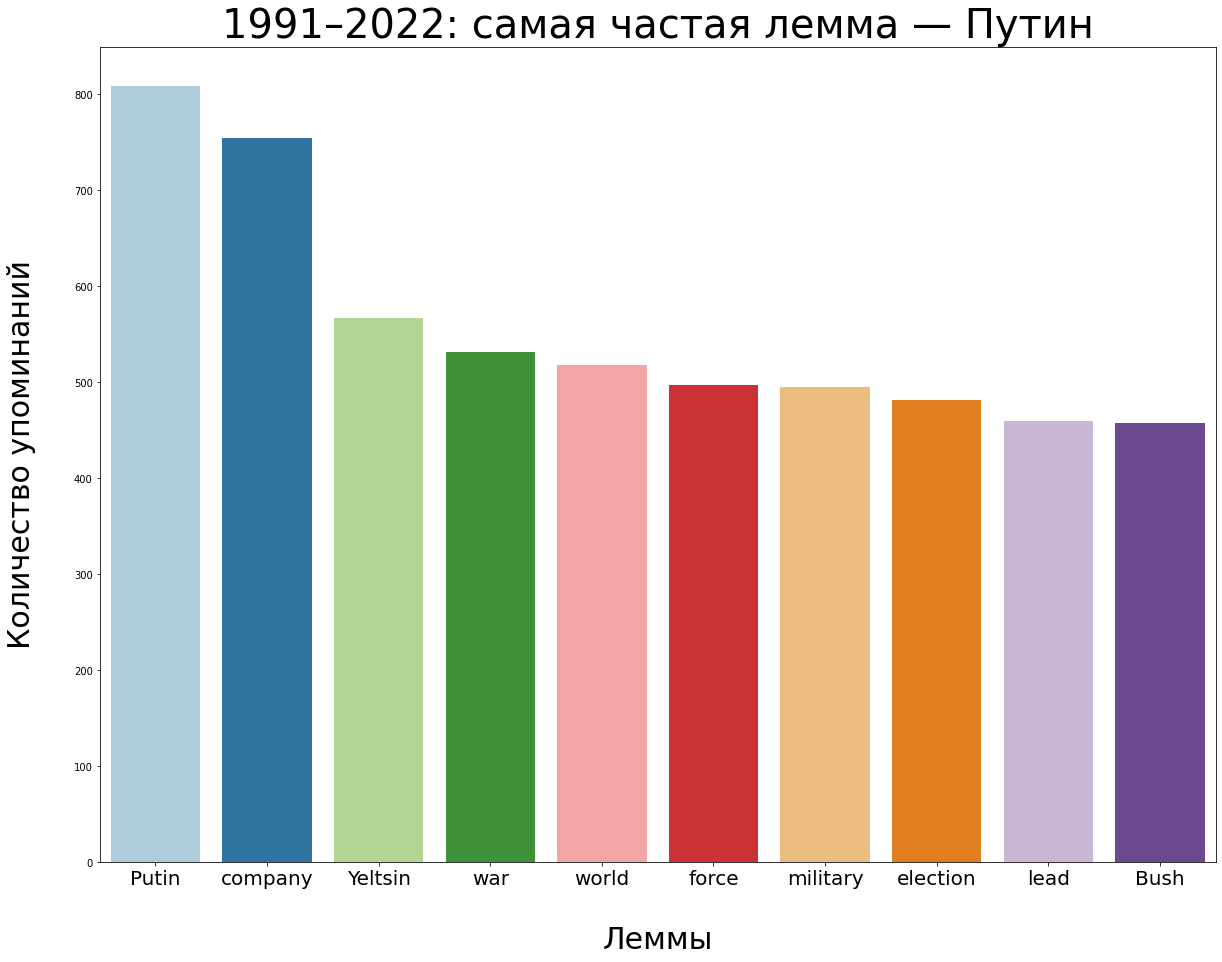

In [128]:
lemma_counts_ab = Counter(words_ab)
most_common_lemmas = lemma_counts_ab.most_common(10)

fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas], y = [count for lemma, count in most_common_lemmas], palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas)), [lemma for lemma, count in most_common_lemmas], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("1991–2022: самая частая лемма — Путин", fontsize = 40)
plt.show()

fig.savefig('1991-2022 lemmas (abstract).png', dpi = 300)

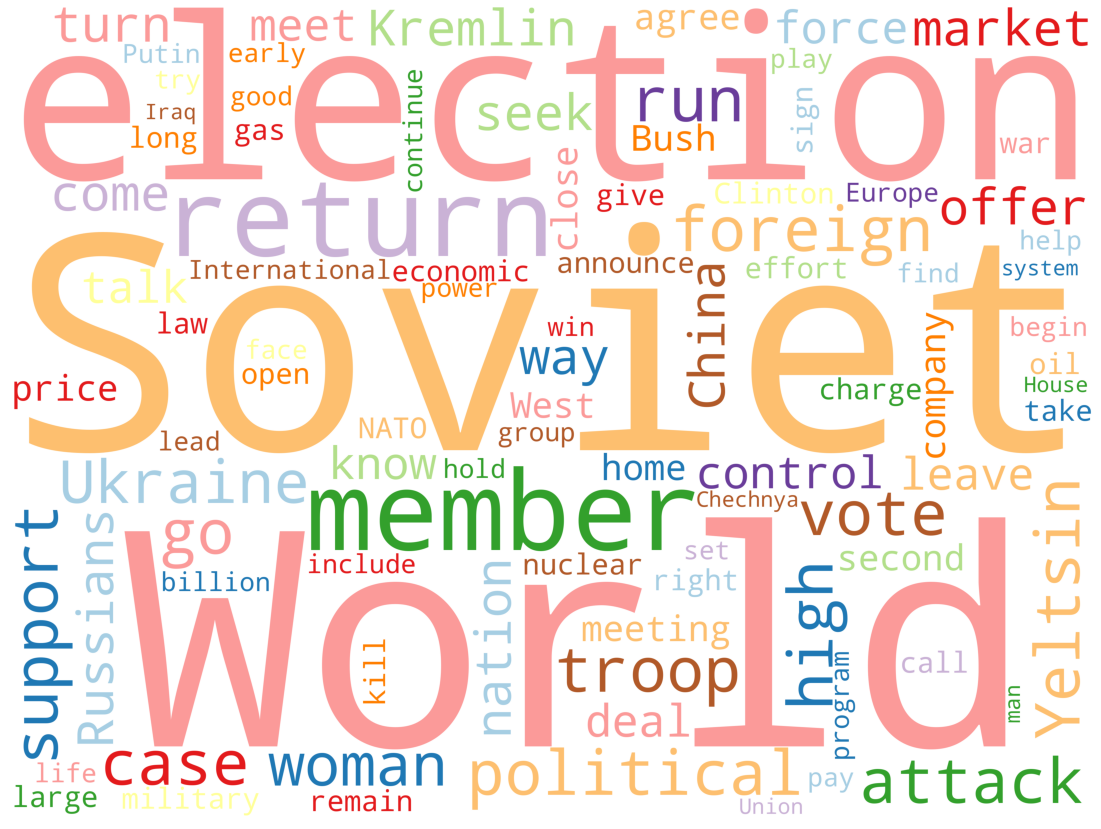

In [129]:
words_ab = []
most_common_ab = lemma_counts_ab.most_common(100)
def lemmas_words(most_common, words):
  for i in most_common:
    words.append(i[0])
lemmas_words(most_common_ab, words_ab)
words_ab = list(set(words_ab))
text_ab = ','.join(words_ab)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text_ab)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('1991-2022 words (abstract)', dpi = 300)

а теперь в столбце keywords:

In [130]:
doc_key = nlp(','.join(df[df['keywords'].str.isalpha() == True]['keywords']))
lemmas = []
for token in doc_key:
    if not token.is_stop and token.is_alpha:
        lemmas.append(token.lemma_)
words_key = [word for word in lemmas if word not in stopwords]
right_words(words_key)

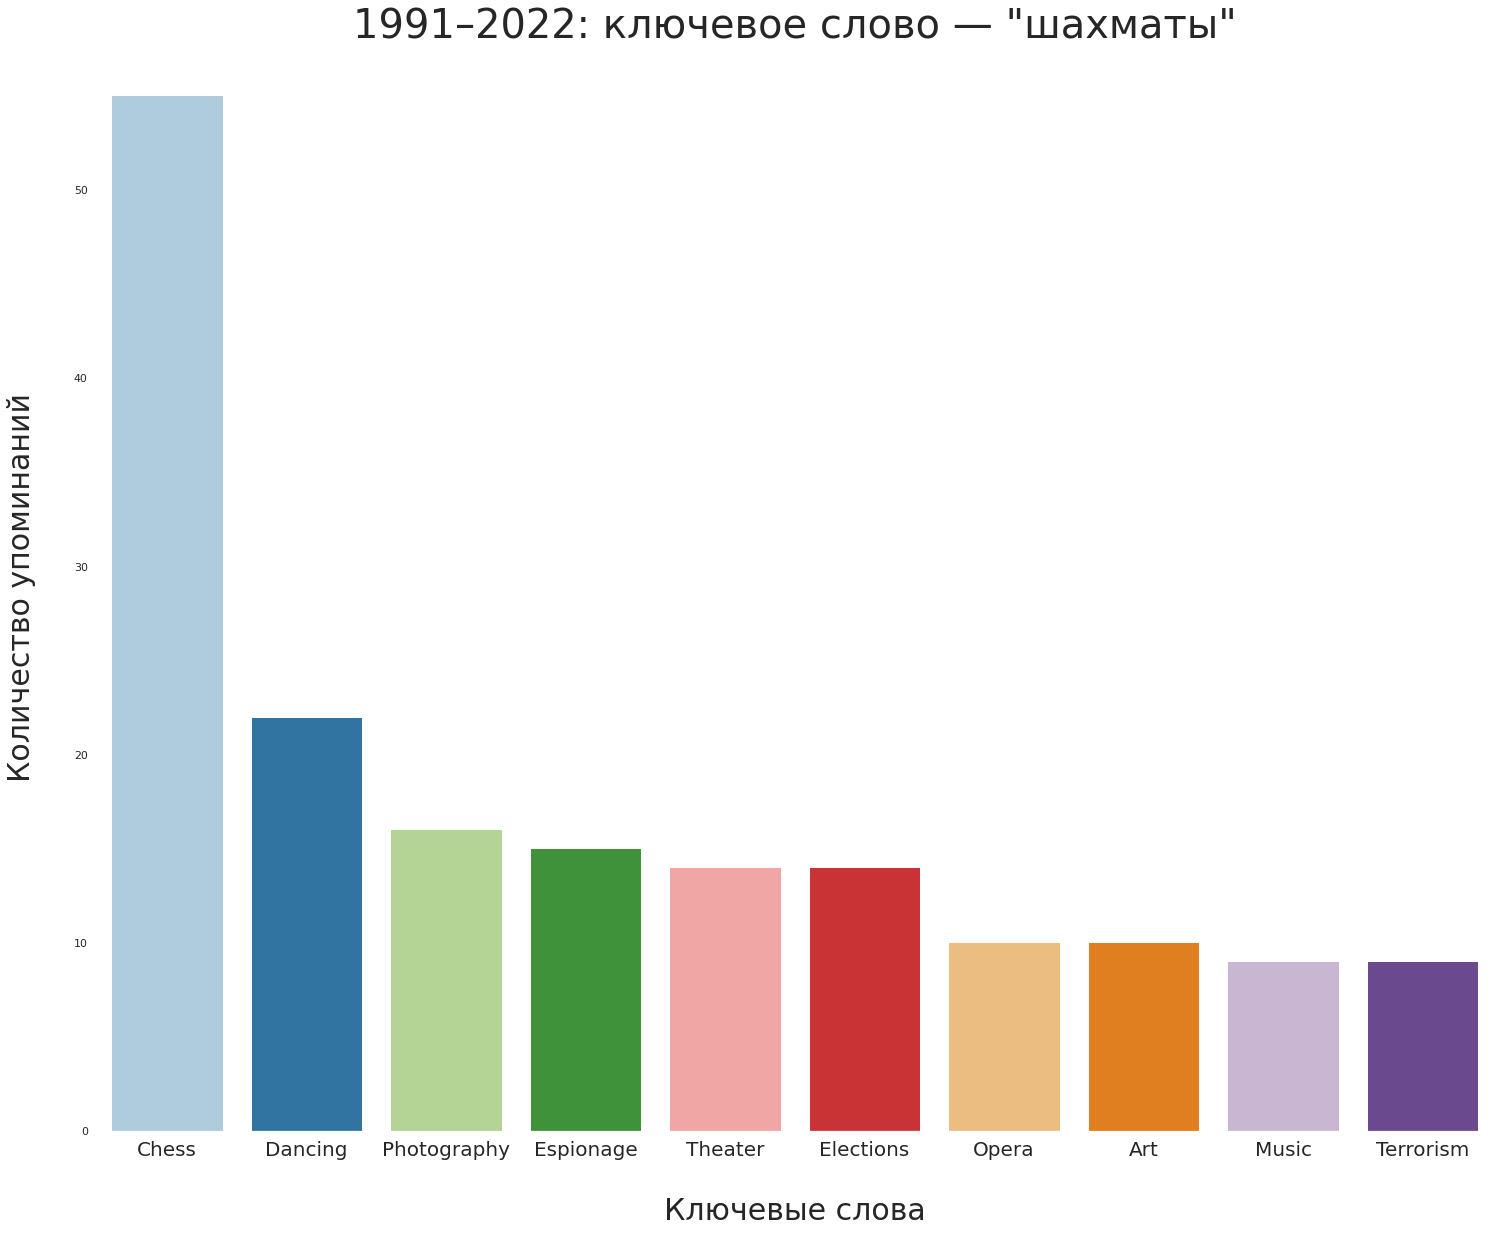

In [131]:
lemma_counts_key = Counter(words_key)
most_common_lemmas_key = lemma_counts_key.most_common(10)

fig = plt.figure(figsize=(25,20))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas_key], y = [count for lemma, count in most_common_lemmas_key], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas_key)), [lemma for lemma, count in most_common_lemmas_key], fontsize = 20)
plt.xlabel("\nКлючевые слова", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title('1991–2022: ключевое слово — "шахматы"', fontsize = 40)
plt.show()

fig.savefig('1991-2022 keywords', dpi = 300)

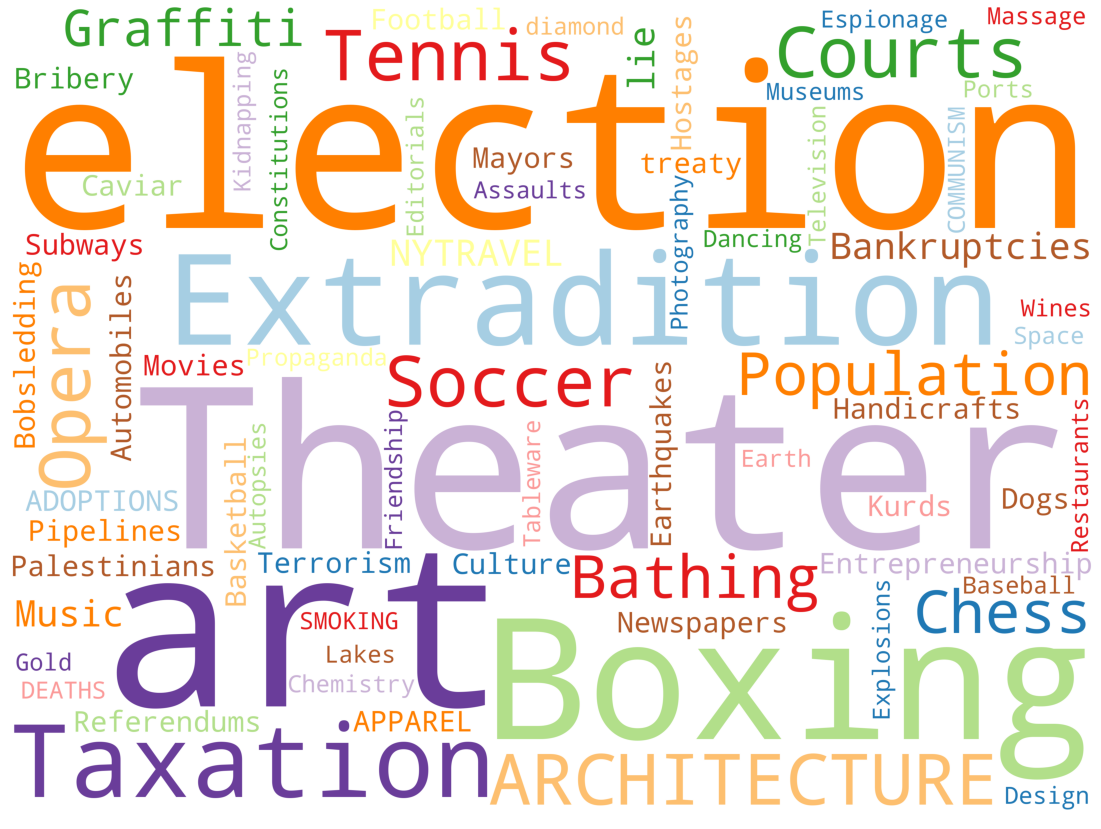

In [132]:
words_key = []
most_common_key = lemma_counts_key.most_common(100)
lemmas_words(most_common_key, words_key)
words_key = list(set(words_key))
text_key = ','.join(words_key)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text_key)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('1991-2022 words (keywords)', dpi = 300)

### 1991-1995

In [133]:
doc91 = nlp(','.join(df91_95['abstract']))
lemmas91 = []
for token in doc91:
    if not token.is_stop and token.is_alpha:
        lemmas91.append(token.lemma_)
words91 = [word for word in lemmas91 if word not in stopwords]
right_words(words91)

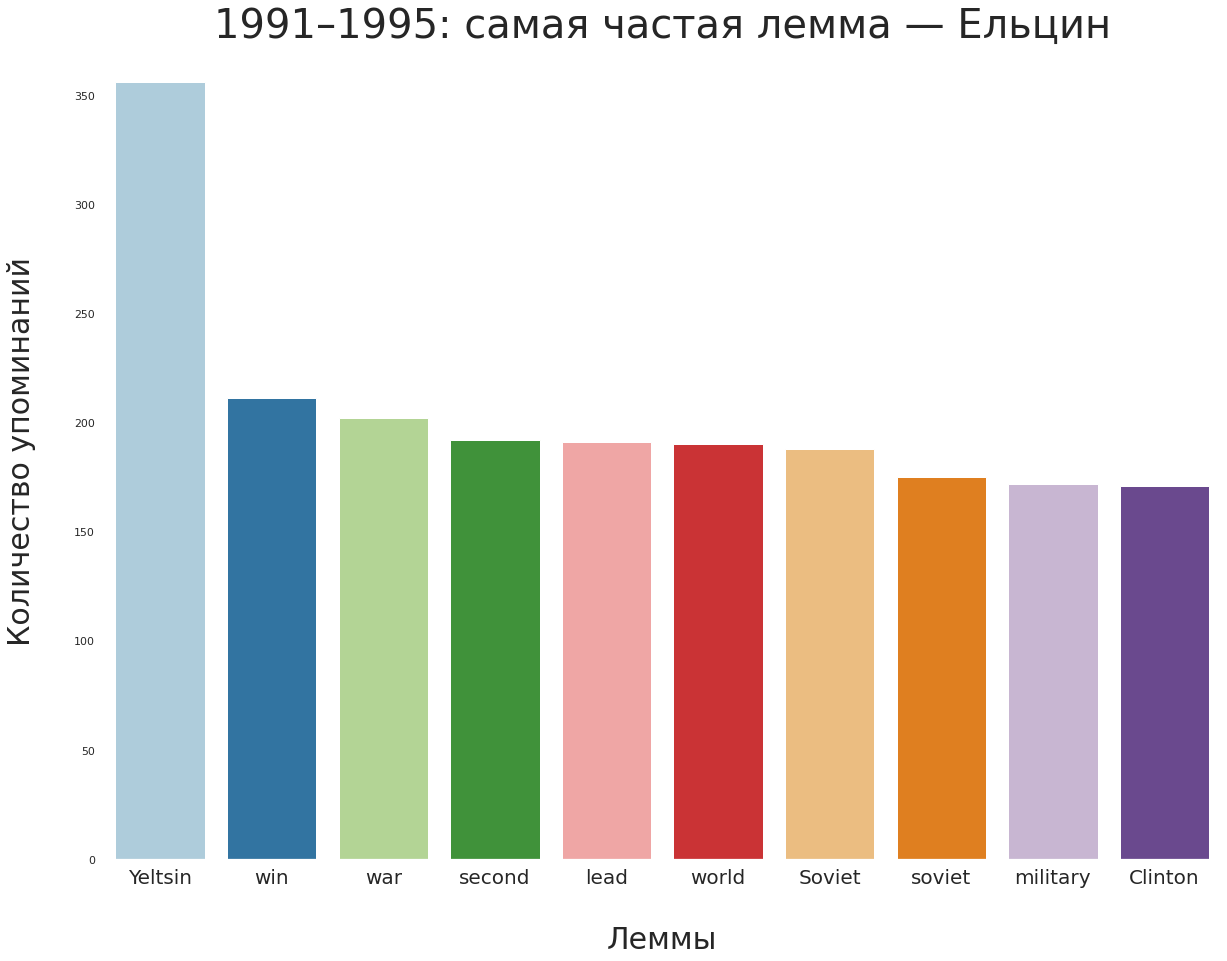

In [134]:
lemma_counts91 = Counter(words91)
most_common_lemmas91 = lemma_counts91.most_common(10)

fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas91], y = [count for lemma, count in most_common_lemmas91], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas91)), [lemma for lemma, count in most_common_lemmas91], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("1991–1995: самая частая лемма — Ельцин", fontsize = 40)
plt.show()

fig.savefig('1991-1995 lemmas.png', dpi = 300)

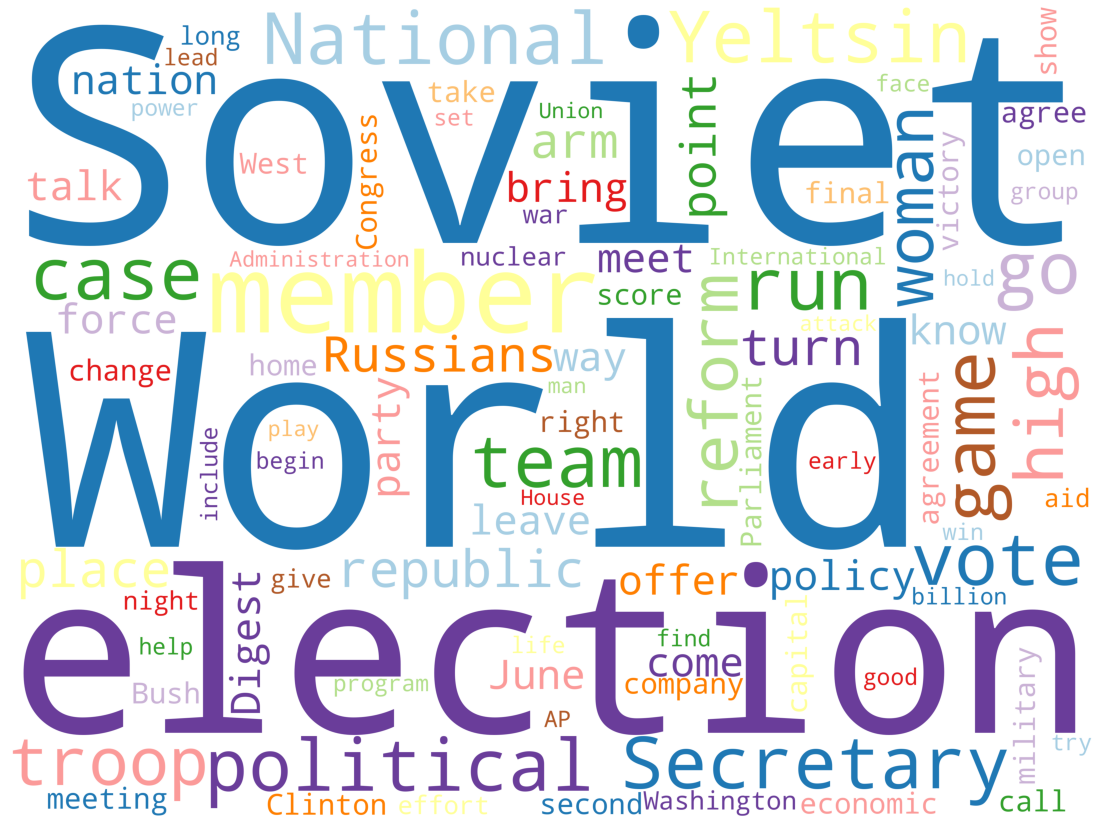

In [135]:
words91 = []
most_common91 = lemma_counts91.most_common(100)
lemmas_words(most_common91, words91)
words91 = list(set(words91))
text91 = ','.join(words91)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text91)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('1991-1995 words', dpi = 300)

### 1996-2000

In [136]:
doc96 = nlp(','.join(df96_00['abstract']))
lemmas96 = []
for token in doc96:
    if not token.is_stop and token.is_alpha:
        lemmas96.append(token.lemma_)
words96 = [word for word in lemmas96 if word not in stopwords]
right_words(words96)

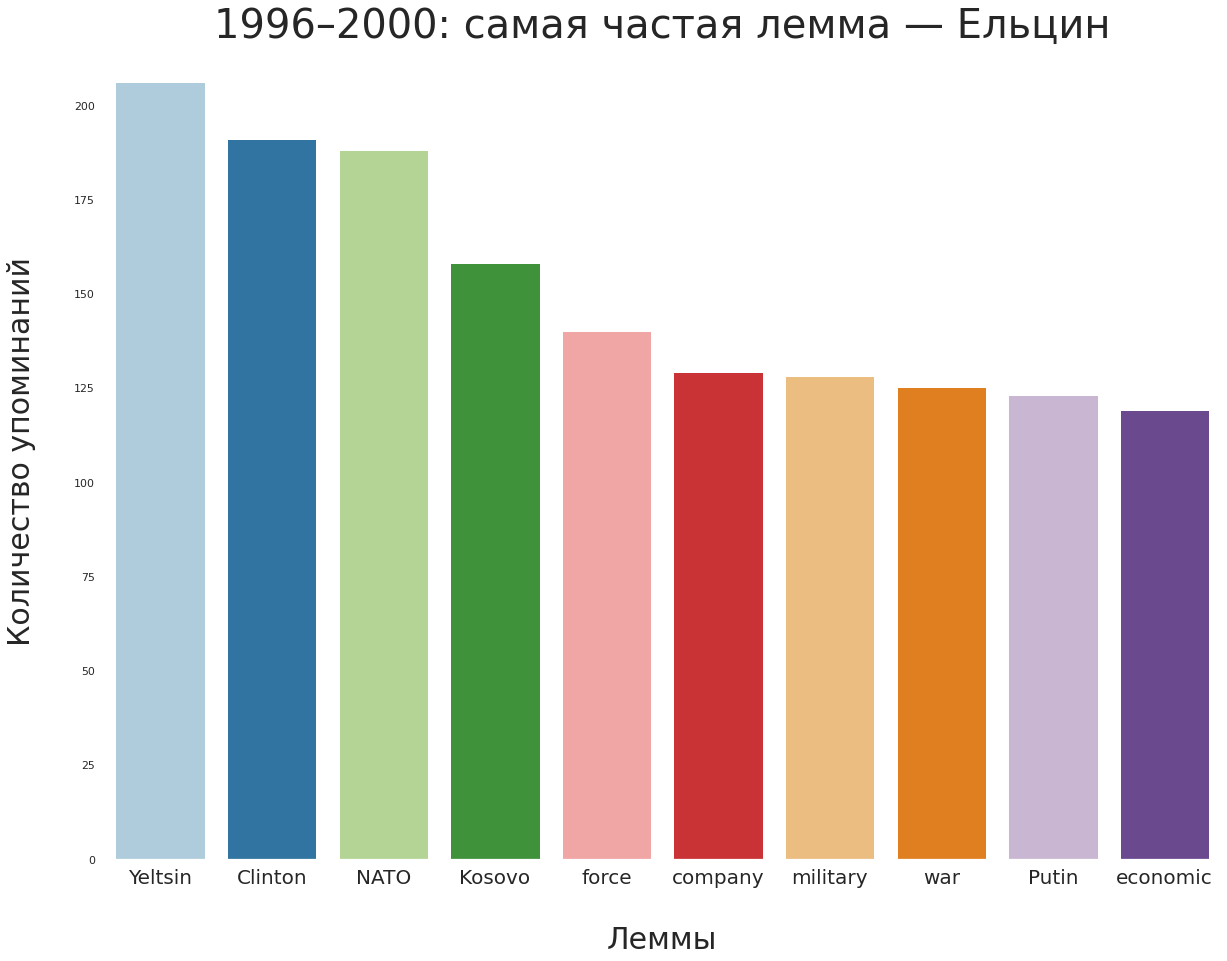

In [137]:
lemma_counts96 = Counter(words96)
most_common_lemmas96 = lemma_counts96.most_common(10)

fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas96], y = [count for lemma, count in most_common_lemmas96], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas96)), [lemma for lemma, count in most_common_lemmas96], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("1996–2000: самая частая лемма — Ельцин", fontsize = 40)
plt.show()

fig.savefig('1996-2000 lemmas.png', dpi = 300)

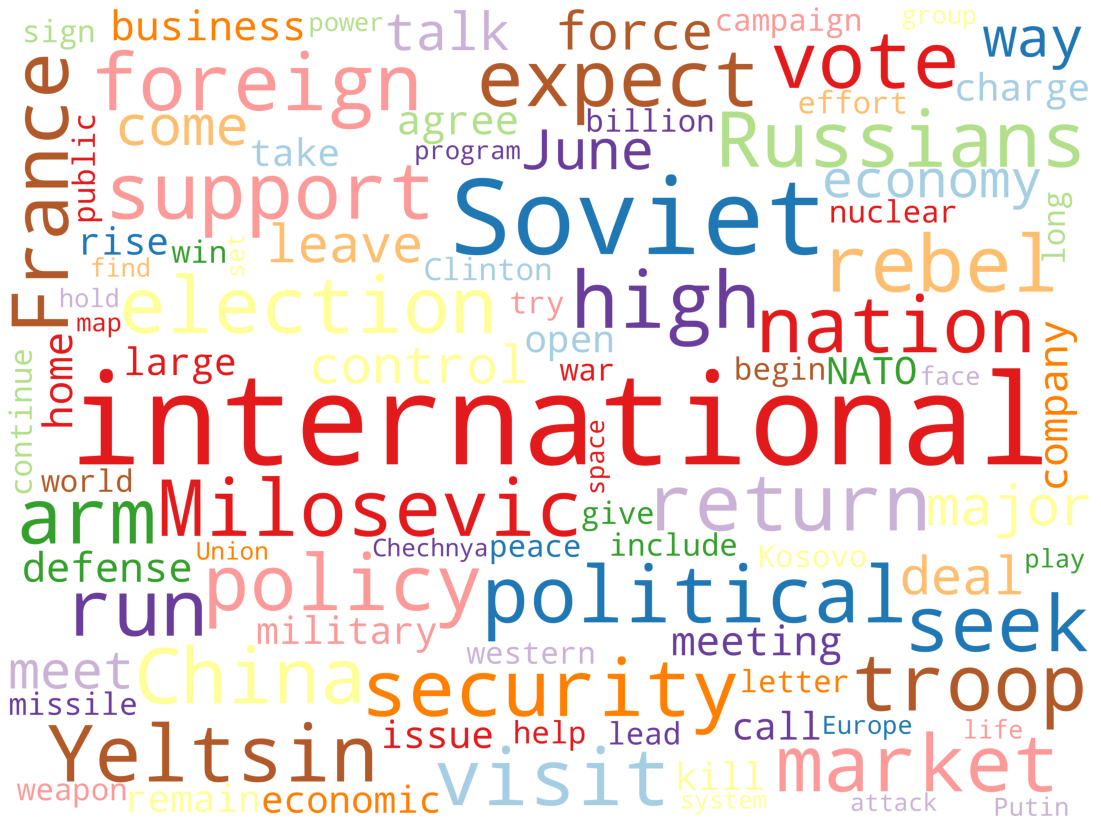

In [138]:
words96 = []
most_common96 = lemma_counts96.most_common(100)
lemmas_words(most_common96, words96)
words96 = list(set(words96))
text96 = ','.join(words96)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap='Paired', stopwords = stopwords).generate(text96)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('1996-2000 words', dpi = 300)

### 2001-2005

In [139]:
doc01 = nlp(','.join(df01_05['abstract']))
lemmas01 = []
for token in doc01:
    if not token.is_stop and token.is_alpha:
        lemmas01.append(token.lemma_)
words01 = [word for word in lemmas01 if word not in stopwords]
right_words(words01)

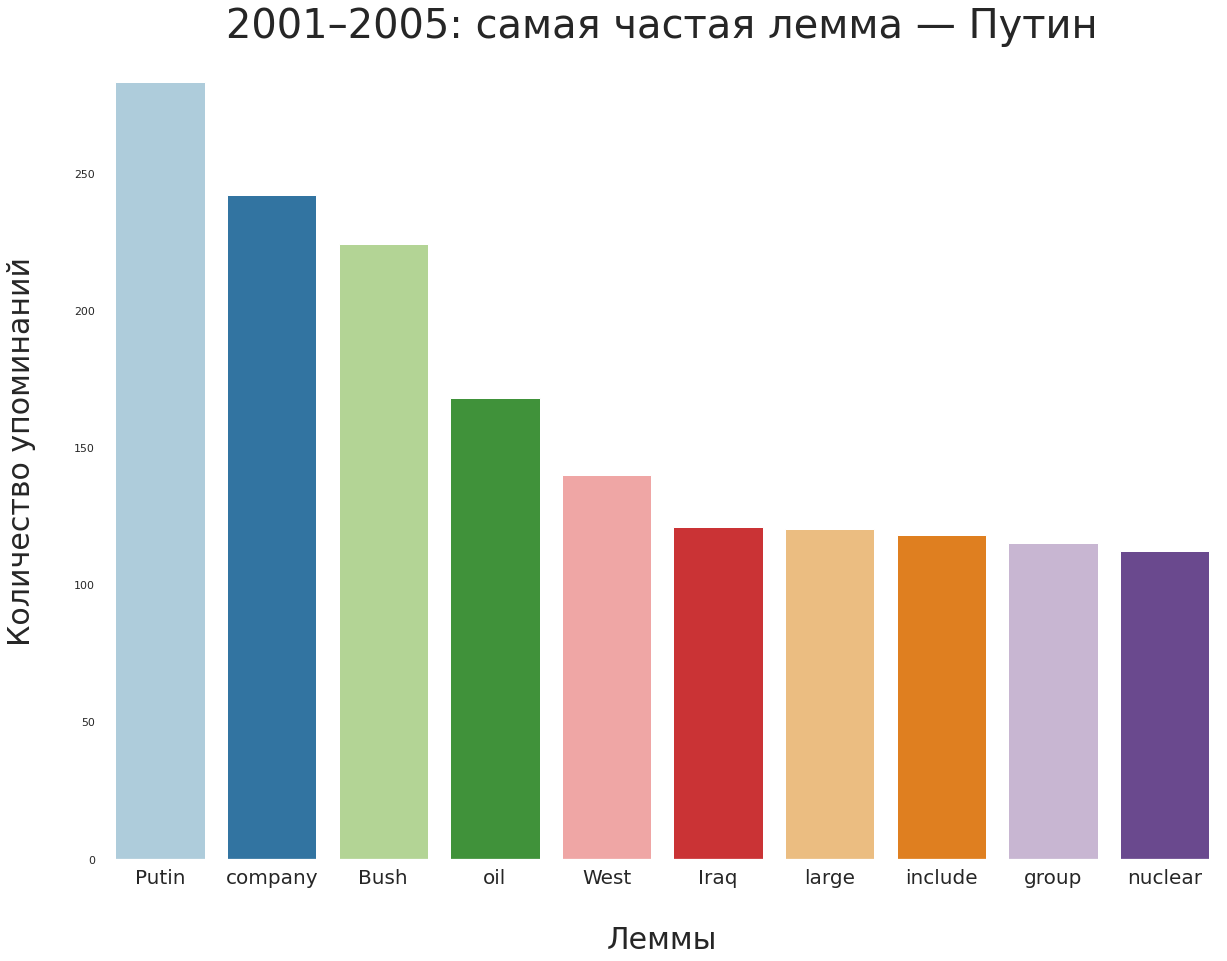

In [140]:
lemma_counts01 = Counter(words01)
most_common_lemmas01 = lemma_counts01.most_common(10)
fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas01], y = [count for lemma, count in most_common_lemmas01], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas01)), [lemma for lemma, count in most_common_lemmas01], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("2001–2005: самая частая лемма — Путин", fontsize = 40)
plt.show()

fig.savefig('2001-2005 lemmas.png', dpi = 300)

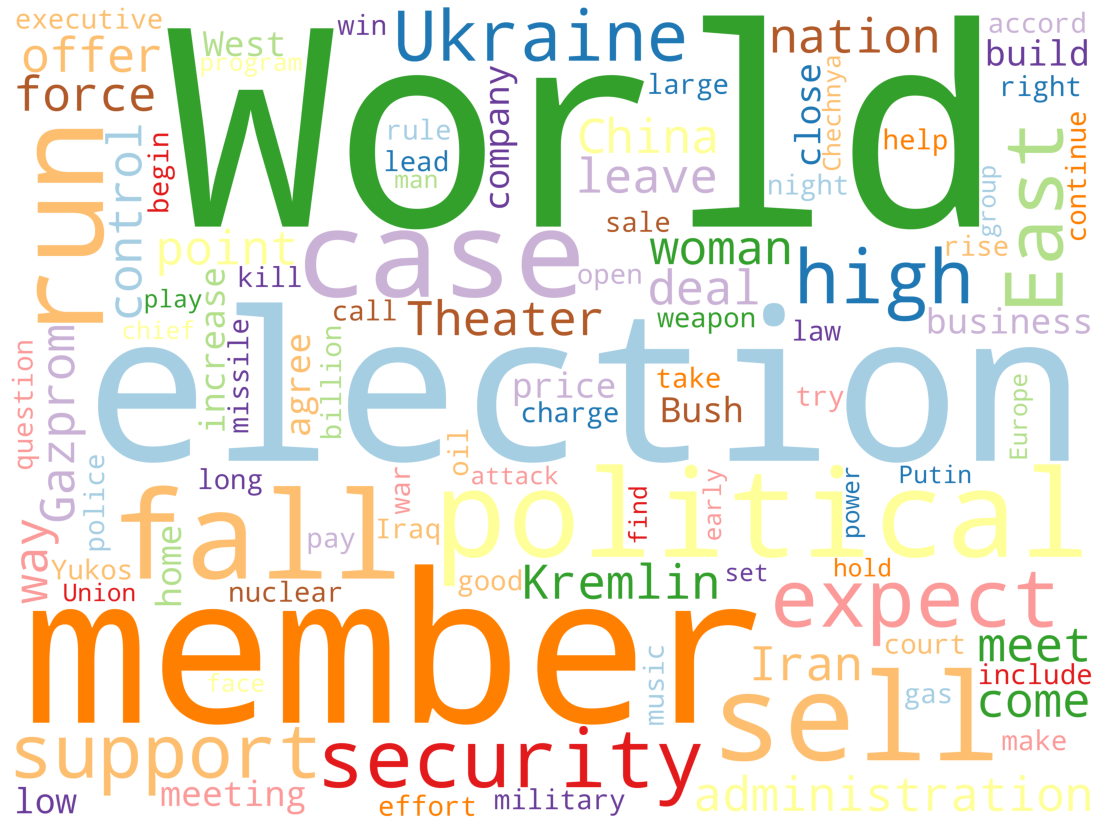

In [141]:
words01 = []
most_common01 = lemma_counts01.most_common(100)
lemmas_words(most_common01, words01)
words01 = list(set(words01))
text01 = ','.join(words01)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text01)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('2001-2005 words', dpi = 300)

### 2006-2010

In [ ]:
doc06 = nlp(','.join(df06_10['abstract']))
lemmas06 = []
for token in doc06:
    if not token.is_stop and token.is_alpha:
        lemmas06.append(token.lemma_)
words06 = [word for word in lemmas06 if word not in stopwords]
right_words(words06)

In [ ]:
lemma_counts06 = Counter(words06)
most_common_lemmas06 = lemma_counts06.most_common(10)
fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas06], y = [count for lemma, count in most_common_lemmas06], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas06)), [lemma for lemma, count in most_common_lemmas06], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("2006–2010: самая частая лемма — компания", fontsize = 40)
plt.show()

fig.savefig('2006-2010 lemmas.png', dpi = 300)

In [ ]:
words06 = []
most_common06 = lemma_counts06.most_common(100)
lemmas_words(most_common06, words06)
words06 = list(set(words06))
text06 = ','.join(words06)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text06)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('2006-2010 words', dpi = 300)

### 2011-2015

In [ ]:
doc11 = nlp(','.join(df11_15['abstract']))
lemmas11 = []
for token in doc11:
    if not token.is_stop and token.is_alpha:
        lemmas11.append(token.lemma_)
words11 = [word for word in lemmas11 if word not in stopwords]
right_words(words11)

In [ ]:
lemma_counts11 = Counter(words11)
most_common_lemmas11 = lemma_counts11.most_common(10)
fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas11], y = [count for lemma, count in most_common_lemmas11], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas11)), [lemma for lemma, count in most_common_lemmas11], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("2011–2015: самая частая лемма — Путин", fontsize = 40)
plt.show()

fig.savefig('2011-2015 lemmas.png', dpi = 300)

In [ ]:
words11 = []
most_common11 = lemma_counts11.most_common(100)
lemmas_words(most_common11, words11)
words11 = list(set(words11))
text11 = ','.join(words11)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap='Paired', stopwords = stopwords).generate(text11)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('2011-2015 words', dpi = 300)

### 2016-2020

In [ ]:
doc16 = nlp(','.join(df16_20['abstract']))
lemmas16 = []
for token in doc16:
    if not token.is_stop and token.is_alpha:
        lemmas16.append(token.lemma_)
words16 = [word for word in lemmas16 if word not in stopwords]
right_words(words16)

In [ ]:
lemma_counts16 = Counter(words16)
most_common_lemmas16 = lemma_counts16.most_common(10)
fig = plt.figure(figsize=(25,20))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas16], y = [count for lemma, count in most_common_lemmas16], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas16)), [lemma for lemma, count in most_common_lemmas16], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("2016–2020: самая частая лемма — Трамп", fontsize = 40)
plt.show()

fig.savefig('2016-2020 lemmas.png', dpi = 300)

In [ ]:
words16 = []
most_common16 = lemma_counts16.most_common(100)
lemmas_words(most_common16, words16)
words16 = list(set(words16))
text16 = ','.join(words16)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text16)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('2016-2020 words', dpi = 300)

### 2021-2022

In [ ]:
doc21 = nlp(','.join(df21_22['abstract']))
lemmas21 = []
for token in doc21:
    if not token.is_stop and token.is_alpha:
        lemmas21.append(token.lemma_)
words21 = [word for word in lemmas21 if word not in stopwords]
right_words(words21)

In [ ]:
lemma_counts21 = Counter(words21)
most_common_lemmas21 = lemma_counts21.most_common(10)
fig = plt.figure(figsize=(20,15))
sns.barplot(x = [lemma for lemma, count in most_common_lemmas21], y = [count for lemma, count in most_common_lemmas21], 
            palette = 'Paired')
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.xticks(range(len(most_common_lemmas21)), [lemma for lemma, count in most_common_lemmas21], fontsize = 20)
plt.xlabel("\nЛеммы", fontsize = 30)
plt.ylabel("Количество упоминаний\n", fontsize = 30)
plt.title("2021–2022: самая частая лемма — Украина", fontsize = 40)
plt.show()

fig.savefig('2021-2022 lemmas.png', dpi = 300)

In [ ]:
words21 = []
most_common21 = lemma_counts21.most_common(100)
lemmas_words(most_common21, words21)
words21 = list(set(words21))
text21 = ','.join(words21)
fig = plt.figure(figsize=(20, 15))
wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'white', margin = 10, 
                      colormap = 'Paired', stopwords = stopwords).generate(text21)
plt.imshow(wordcloud) 
plt.axis("off")
fig.savefig('2021-2022 words', dpi = 300)

## Оценка настроения + анализ полярности и субъективности

In [ ]:
nltk.downloader.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [ ]:
!pip install textblob

In [ ]:
nltk.downloader.download('wordnet')
nltk.downloader.download('punkt')
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

### 1991-2022

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df['abstract']))
print("\nАнализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 1991-1995

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df91_95['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df91_95['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df91_95['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df91_95['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 1996-2000

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df96_00['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df96_00['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df96_00['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df96_00['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 2001-2005

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df01_05['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df01_05['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df01_05['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df01_05['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 2006-2010

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df06_10['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df06_10['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df06_10['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df06_10['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 2011-2015

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df11_15['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df11_15['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df11_15['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df11_15['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 2016-2020

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df16_20['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df16_20['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df16_20['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df16_20['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### 2021-2022

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df21_22['headline']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df21_22['headline']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

In [ ]:
sentiment_scores = sid.polarity_scores(','.join(df21_22['abstract']))
print("Анализ настроения:")
print(f"Позитивные: {sentiment_scores['pos']:.2f}")
print(f"Негативные: {sentiment_scores['neg']:.2f}")
print(f"Нейтральные: {sentiment_scores['neu']:.2f}")
print(f"Всего: {sentiment_scores['compound']:.2f}")

sentences = nltk.sent_tokenize(','.join(df21_22['abstract']))
lemmatizer = WordNetLemmatizer()
filtered_words = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words.extend(words)
text_blob = TextBlob(" ".join(filtered_words))
sentiment = text_blob.sentiment
print("\nПолярность: ", sentiment.polarity)
print("Субъективность: ", sentiment.subjectivity)

### Общие графики

In [175]:
df_mood_head = pd.DataFrame() #по заголовкам
df_mood_head.index = ['Позитивные', 'Негативные', 'Нейтральные']
df_mood_head['1991-1995'] = 0.10, 0.12, 0.78
df_mood_head['1996-2000'] = 0.12, 0.13, 0.75
df_mood_head['2001-2005'] = 0.09, 0.14, 0.77
df_mood_head['2006-2010'] = 0.10, 0.13, 0.77
df_mood_head['2011-2015'] = 0.09, 0.16, 0.75 
df_mood_head['2016-2020'] = 0.09, 0.15, 0.76
df_mood_head['2021-2022'] = 0.09, 0.18, 0.73
df_mood_head

,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020,2021-2022
Позитивные,0.10,0.12,0.09,0.10,0.09,0.09,0.09
Негативные,0.12,0.13,0.14,0.13,0.16,0.15,0.18
Нейтральные,0.78,0.75,0.77,0.77,0.75,0.76,0.73


In [176]:
df_mood_abstract = pd.DataFrame() #по заголовкам
df_mood_abstract.index = ['Позитивные', 'Негативные', 'Нейтральные']
df_mood_abstract['1991-1995'] = 0.10, 0.10, 0.80
df_mood_abstract['1996-2000'] = 0.11, 0.11, 0.78
df_mood_abstract['2001-2005'] = 0.10, 0.11, 0.79
df_mood_abstract['2006-2010'] = 0.11, 0.10, 0.79
df_mood_abstract['2011-2015'] = 0.10, 0.12, 0.78
df_mood_abstract['2016-2020'] = 0.10, 0.11, 0.79
df_mood_abstract['2021-2022'] = 0.09, 0.15, 0.77
df_mood_abstract

,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020,2021-2022
Позитивные,0.1,0.11,0.10,0.11,0.10,0.10,0.09
Негативные,0.1,0.11,0.11,0.10,0.12,0.11,0.15
Нейтральные,0.8,0.78,0.79,0.79,0.78,0.79,0.77


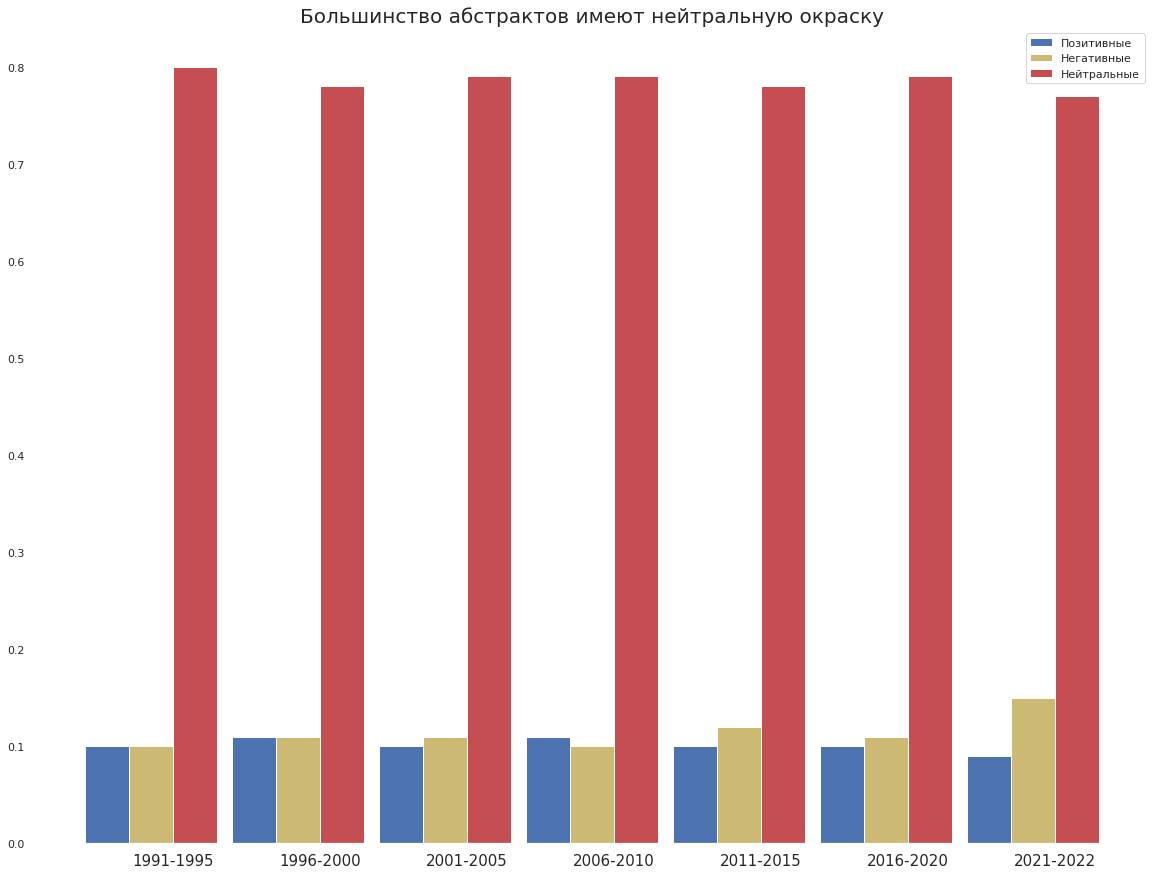

In [177]:
index = np.arange(7)
values1 = df_mood_abstract.iloc[0]
values2 = df_mood_abstract.iloc[1]
values3 = df_mood_abstract.iloc[2]
bw = 0.3
plt.figure(figsize=(20,15))
plt.title('Большинство абстрактов имеют нейтральную окраску', fontsize=20)
plt.bar(index, values1, bw, color='b', label='Позитивные')
plt.bar(index+bw, values2, bw, color='y', label='Негативные')
plt.bar(index+2*bw, values3, bw, color='r', label='Нейтральные')
plt.xticks(index+1.5*bw,['1991-1995','1996-2000','2001-2005','2006-2010','2011-2015', '2016-2020', '2021-2022'], fontsize=15)
plt.legend()
plt.show()

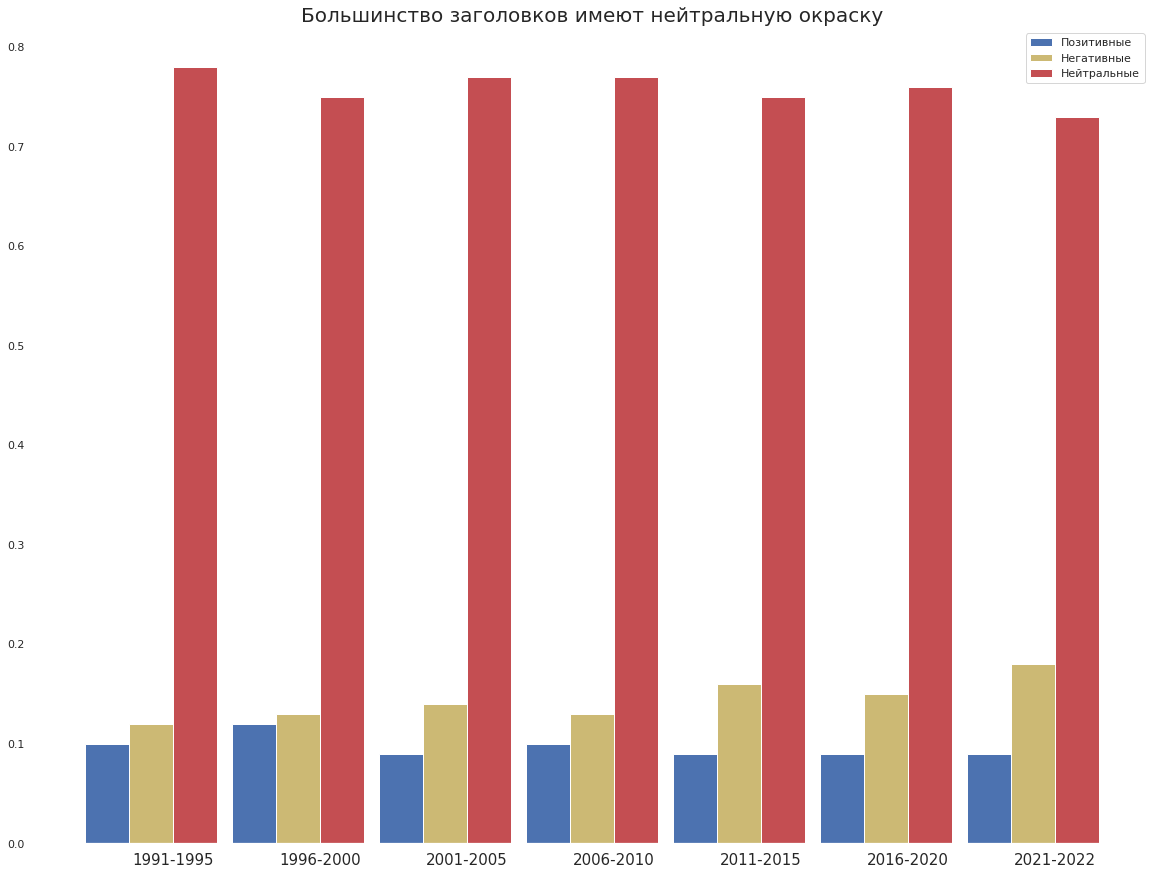

In [178]:
index = np.arange(7)
values1 =df_mood_head.iloc[0]
values2 =df_mood_head.iloc[1]
values3 =df_mood_head.iloc[2]
bw = 0.3
plt.figure(figsize=(20,15))
plt.title('Большинство заголовков имеют нейтральную окраску', fontsize=20)
plt.bar(index, values1, bw, color='b', label='Позитивные')
plt.bar(index+bw, values2, bw, color='y', label='Негативные')
plt.bar(index+2*bw, values3, bw, color='r', label='Нейтральные')
plt.xticks(index+1.5*bw,['1991-1995','1996-2000','2001-2005','2006-2010','2011-2015', '2016-2020', '2021-2022'], fontsize=15)
plt.legend()
plt.show()

In [179]:
df_pol_sub_head = pd.DataFrame() #по заголовкам
df_pol_sub_head.index = ['Полярность', 'Субъективность']
df_pol_sub_head['1991-1995'] = 0.021721056112503506, 0.34591160666818616
df_pol_sub_head['1996-2000'] = 0.002162834951679577, 0.40124833997343934
df_pol_sub_head['2001-2005'] = 0.009926688176688174, 0.4173323928323932
df_pol_sub_head['2006-2010'] = 0.07512202315122023, 0.33356402923921186
df_pol_sub_head['2011-2015'] = 0.0223521298002267, 0.37809194265941687
df_pol_sub_head['2016-2020'] = 0.014477637746868518, 0.39100950331719564
df_pol_sub_head['2021-2022'] = 0.03382094468031973, 0.3965014913712832
df_pol_sub_head

,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020,2021-2022
Полярность,0.021721,0.002163,0.009927,0.075122,0.022352,0.014478,0.033821
Субъективность,0.345912,0.401248,0.417332,0.333564,0.378092,0.391010,0.396501


In [180]:
df_pol_sub_abs = pd.DataFrame() #по абстрактам
df_pol_sub_abs.index = ['Полярность', 'Субъективность']
df_pol_sub_abs['1991-1995'] = 0.05344910035609729, 0.37689880953959554
df_pol_sub_abs['1996-2000'] = 0.045344096339358625, 0.35979776475548897
df_pol_sub_abs['2001-2005'] = 0.0545714216113241, 0.38600818347866467
df_pol_sub_abs['2006-2010'] = 0.0450952355413633, 0.37001762920954867
df_pol_sub_abs['2011-2015'] = 0.03185358486829074, 0.3621645142560178
df_pol_sub_abs['2016-2020'] = 0.048020225700225724, 0.3687373870573871
df_pol_sub_abs['2021-2022'] = 0.0017578859988931865, 0.38931538725063924
df_pol_sub_abs

,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020,2021-2022
Полярность,0.053449,0.045344,0.054571,0.045095,0.031854,0.048020,0.001758
Субъективность,0.376899,0.359798,0.386008,0.370018,0.362165,0.368737,0.389315


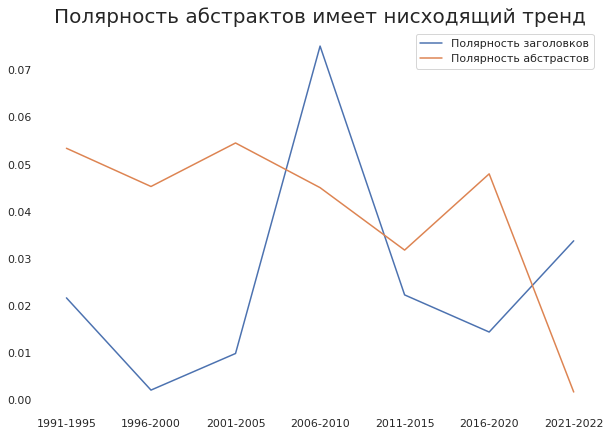

In [181]:
plt.figure(figsize=(10,7))
plt.plot(df_pol_sub_head.iloc[0], label = 'Полярность заголовков')
plt.plot(df_pol_sub_abs.iloc[0],  label = 'Полярность абстрастов')
plt.title('Полярность абстрактов имеет нисходящий тренд', fontsize=20)
plt.legend()
plt.show()

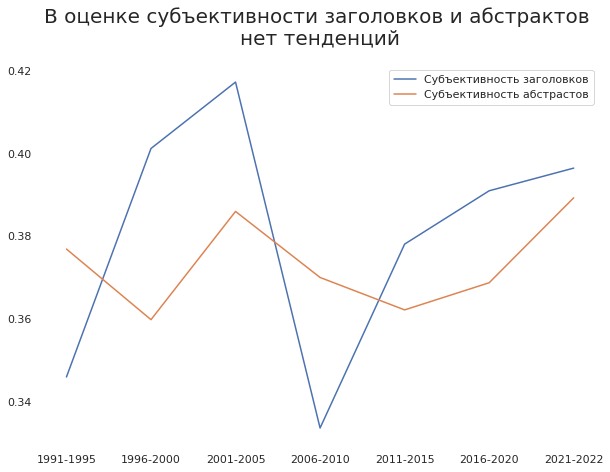

In [182]:
plt.figure(figsize=(10,7))
plt.plot(df_pol_sub_head.iloc[1], label = 'Субъективность заголовков')
plt.plot(df_pol_sub_abs.iloc[1],  label = 'Субъективность абстрастов')
plt.title('В оценке субъективности заголовков и абстрактов \nнет тенденций', fontsize=20, pad = 20)
plt.legend()
plt.show()